# MODULE 2

## Introduction to Pytorch

Pytorch is a library that looks a lot like numpy. It deals with tensors and manipulation of tensors.

## PyTorch Setup

In [0]:
!python -V

Python 3.6.7


In [0]:
#!pip3 install torch torchvision
import torch

In [0]:
print("PyTorch version: ")
torch.__version__

PyTorch version: 


'1.0.0'

In [0]:
print("Device Name: ")
torch.cuda.get_device_name(0)

Device Name: 


'Tesla K80'

In [0]:
print("CUDA Version: ")
print(torch.version.cuda)
print("cuDNN version is: ")
print(torch.backends.cudnn.version())

CUDA Version: 
9.0.176
cuDNN version is: 
7401


In [0]:
# NVIDIA profiling tool for the available GPU
!nvidia-smi

In [0]:
!cat /proc/cpuinfo

In [0]:
!cat /proc/meminfo

## What is a tensor?

The inputs, outputs, and transformations within neural networks are all represented using tensors, and as a result, neural network programming utilizes tensors heavily. 

 The concept of a tensor is a mathematical generalization of other more specific concepts. Let’s look at some specific instances of tensors.
 
**Specific instances of tensors**

Each of these examples are specific instances of the more general concept of a tensor:

* number
* scalar
* array
* vector
* 2d-array
* matrix

Let’s organize the above list of example tensors into two groups:

* number, array, 2d-array
* scalar, vector, matrix

The first group of three terms (number, array, 2d-array) are terms that are typically used in computer science, while the second group (scalar, vector, matrix) are terms that are typically used in mathematics. 

Tensors can be created using the following **syntax**.

In [0]:
c = torch.tensor([[1,2],[1,2]]) 
d = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])

## Tensor Types 
Tensors are **homogeneous** as all the items within it are of the **same data type**. PyTorch tensors are instances of the torch.Tensor Python class. We can create a torch.Tensor object using the class constructor as below. They can also be created from torch.tensor. 

In [0]:
a = torch.tensor([0,1,2,3,4])

In [0]:
print("Type of entire array:")
type(a)

Type of entire array:


torch.Tensor

In [0]:
print("Datatype of tensor:")
a.type()

Datatype of tensor:


'torch.LongTensor'

Every torch.Tensor has these attributes:

* torch.dtype
* torch.device
* torch.layout

Looking at our Tensor a, we can see the following default attribute values: 

In [0]:
print(a.dtype)
print(a.device)
print(a.layout)

torch.int64
cpu
torch.strided


Tensor datatypes are given in the table below. Note that torch.tensor is an alias for the default tensor type (torch.FloatTensor).

| Data type | dtype   | CPU tensor | GPU Tensor   |
|-------  |------|------   |------|
|  32-bit floating point    | torch.float32 or torch.float     |   torch.FloatTensor      | torch.cuda.FloatTensor |
|  64-bit floating point    | torch.float64 or torch.double |   torch.DoubleTensor   | torch.cuda.DoubleTensor |
|  16-bit floating point    | torch.float16 or torch.half      |   torch.HalfTensor        | torch.cuda.HalfTensor |
|  8-bit integer (unsigned)    | torch.uint8                          |   torch.ByteTensor       | torch.cuda.ByteTensor |
|  8-bit integer (signed)    | torch.int8                                 |   torch.CharTensor       | torch.cuda.CharTensor |
|  16-bit integer (signed)    | torch.int16 or torch.short   |   torch.ShortTensor     | torch.cuda.ShortTensor |
|  32-bit integer (signed)    | torch.int32 or torch.int        |   torch.IntTensor          | torch.cuda.IntTensor |
|  64-bit integer (signed)    | torch.int64 or torch.long     |   torch.LongTensor     | torch.cuda.LongTensor |

**Type casting** is also supported. In the example below, the method FloatTensors casts integers into float. If we have a device like above, we can create a tensor on the device by passing the device to the tensor’s constructor. 

In [0]:
b = torch.FloatTensor([0,1,2,3,4])
print("Type of b: ")
b.type()

Type of b: 


'torch.FloatTensor'

In [0]:
a = a.type(torch.FloatTensor)
print("Type of a: ")
a.type()

Type of a: 


'torch.FloatTensor'

Notice how each type in the table has a CPU and GPU version. One thing to keep in mind about tensor data types is that tensor operations between tensors must happen between tensors with the same type of data. 

The device, **cpu** in our case, specifies the device (CPU or GPU) where the tensor's **data** is **allocated**. This determines where **tensor computations** for the given tensor will be performed.

PyTorch supports the use of multiple devices, and they are specified using an index like so: 

In [0]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

One thing to keep in mind about using **multiple devices** is that tensor operations between **tensors** must happen between tensors that **exists** on the **same device**. 

Tensors have a **torch.layout**

The **layout, strided** in our case, specifies how the tensor is **stored** **in memory**.

As neural network programmers, we need to be aware of the following:

* Tensors contain data of a uniform type (dtype).
* Tensor computations between tensors depend on the dtype and the device.


**Creating tensors using data**

These are the primary ways of creating tensor objects (instances of the torch.Tensor class), with data (array-like) in PyTorch:

1. torch.Tensor(data)
2. torch.tensor(data)
3. torch.as_tensor(data)
4. torch.from_numpy(data)

We can use a Python list, or sequence, but numpy.ndarrays are going to be the more common option, so we’ll go with a numpy.ndarray like so: 

In [0]:
import numpy as np
datanp = np.array([1,2,3])
type(datanp)

numpy.ndarray

Note PyTorch tensors can be created with the torch.Tensor constructor, which takes the tensor’s dimensions as input and returns a tensor occupying an uninitialized region of memory

Now, let’s create our tensors with each of these options 1-4, and have a look at what we get: 

In [0]:
o1 = torch.Tensor(datanp)
o2 = torch.tensor(datanp)
o3 = torch.as_tensor(datanp)
o4 = torch.from_numpy(datanp)

print(o1)
print(o2)
print(o3)
print(o4)

print(o1.dtype)
print(o2.dtype)
print(o3.dtype)
print(o4.dtype)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([1, 2, 3])
torch.float32
torch.int64
torch.int64
torch.int64


All of the options (o1, o2, o3, o4) appear to have produced the same tensors except for the first one. 

The first option (o1) has dots after the number indicating that the numbers are floats, while the next three options have a type of int64. 

The difference here arises in the fact that the **torch.Tensor() constructor uses the default dtype** when building the tensor.

The other calls **choose a dtype based on the incoming data**. This is called **type inference**. The dtype is inferred based on the incoming data. Note that the **dtype** can also be **explicitly set** for these calls by specifying the dtype as an argument: 

In [0]:
print(torch.tensor(datanp, dtype=torch.float32))
print(torch.as_tensor(datanp, dtype=torch.float32))

tensor([1., 2., 3.])
tensor([1., 2., 3.])


With torch.Tensor(), we are unable to pass a dtype to the constructor. This is an example of the torch.Tensor() constructor lacking in configuration options. This is one of the reasons to go with the torch.tensor() factory function for creating our tensors. 

**Memory sharing in tensors**

Note that originally, we had datanp[0]=1, and also note that we only changed the data in the original numpy.ndarray. Notice we didn't explicity make any changes to our tensors (o1, o2, o3, o4).

However, after setting datanp[0]=0, we can see some of our tensors have changes.

In [0]:
print('old:', datanp)
datanp[0] = 0
print('new:', datanp)

print(o1)
print(o2)
print(o3)
print(o4)

old: [1 2 3]
new: [0 2 3]
tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([0, 2, 3])
tensor([0, 2, 3])


The first two o1 and o2 still have the original value of 1 for index 0, while the second two o3 and o4 have the new value of 0 for index 0.

This happens because **torch.Tensor() and torch.tensor() copy** their input data while **torch.as_tensor() and torch.from_numpy() share** their input data in memory with the original input object. 

This sharing just means that the actual data in memory exists in a single place. As a result, any changes that occur in the underlying data will be reflected in both objects.

Sharing data is more efficient and uses less memory than copying data because the data is not written to two locations in memory. 

This establishes that torch.as_tensor() and torch.from_numpy() both share memory with their input data. 

The torch.from_numpy() function only accepts numpy.ndarrays, while the torch.as_tensor() function accepts a wide variety of Python array-like objects including other PyTorch tensors. For this reason, torch.as_tensor() is the winning choice in the memory sharing game.

 Given all of these details, these two are the best options:

* torch.tensor()
* torch.as_tensor()

The torch.tensor() call is the sort of go-to call, while torch.as_tensor() should be employed when tuning our code for performance. 

## Rank, Axes and Shape of Tensors

 The concepts of rank, axes, and shape are the tensor attributes that will concern us most in deep learning.

* Rank
* Axes
* Shape

These concepts build on one another starting with rank, then axes, and building up to shape, so keep any eye out for this relationship between these three. 

**Rank of a tensor**

The rank of a tensor refers to the number of dimensions present within the tensor. Suppose we are told that we have a rank-2 tensor. This means all of the following:

* We have a matrix
* We have a 2d-array
* We have a 2d-tensor

We are introducing the word **rank** here because it is commonly used in deep learning when referring to the number of **dimensions** present within a given tensor. 

The rank of a tensor tells us **how many indexes are required to access (refer to) a specific data element** contained within the tensor data structure.

A tensor's rank tells us how many indexes are needed to refer to a specific element within the tensor.

The dimension and size of any tensor can be found using the methods shown below.

In [0]:
s1d = torch.tensor([1,9,1,1])

s2d = torch.tensor([[1,9,1,1], [4,5,6,7]])

#s3d = torch.tensor([ [[1,9,1,1],[4,5,6,7]] , [[2,10,2,2],[8,9,10,11]] ])

s3d = torch.tensor([
                     [
                      [1,9,1,1],
                      [4,5,6,7]
                     ],
                     [
                      [2,10,2,2],
                      [8,9,10,11]
                     ]
                   ])
s4d = torch.tensor([[[[4,1]]]])

*The dimension corresponds to the number of nested list sets*

In [0]:
print("The dimension of tensors s1d, s2d, s3d,s4d are:")
print(s1d.ndimension(),s2d.ndimension(),s3d.ndimension(),s4d.ndimension())

The dimension of tensors s1d, s2d, s3d,s4d are:
1 2 3 4


**Axes of a tensor**

If we have a tensor, and we want to refer to a specific dimension, we use the word axis in deep learning. 

An **axis** of a tensor is a **specific dimension of a tensor**.

If we say that a tensor is a **rank 2 tensor**, we mean that the tensor has 2 dimensions, or **equivalently**, the tensor has **two axes**.

Elements are said to exist or run along an axis. This running is constrained by the length of each axis. 

The **length of each axis** tells us how many **indexes are available along each axis**.

In [0]:
dd = torch.tensor([
[1,2,3],
[4,5,6],
[7,8,9]])

In [0]:
#Each element along the first axis, is an array:
print(dd[0])
print(dd[1])
print(dd[2])

tensor([1, 2, 3])
tensor([4, 5, 6])
tensor([7, 8, 9])


In [0]:
#Each element along the second axis, is a number: 
print(dd[0][0])
print(dd[1][0])
print(dd[2][0])
print(dd[0][1])
print(dd[1][1])
print(dd[2][1])
print(dd[0][2])
print(dd[1][2])
print(dd[2][2])

tensor(1)
tensor(4)
tensor(7)
tensor(2)
tensor(5)
tensor(8)
tensor(3)
tensor(6)
tensor(9)


Note that, with tensors, the elements of the last axis are always numbers (scalar). Every other axis will contain n-dimensional arrays. 

The rank of a tensor tells us how many axes a tensor has, and the length of these axes leads us to the very important concept known as the shape of a tensor. 

**Shape of a tensor**

The **shape** of a tensor is determined by the **length of each axis**, so if we know the shape of a given tensor, then we know the length of each axis, and this tells us how many indexes are available along each axis.

The shape of a tensor gives us the length of each axis of the tensor. Note that, in PyTorch, size and shape of a tensor are the same thing. 

In [0]:
s1d = torch.tensor([1,9,1,1])

s2d = torch.tensor([[1,9,1,1], [4,5,6,7]])

#s3d = torch.tensor([ [[1,9,1,1],[4,5,6,7]] , [[2,10,2,2],[8,9,10,11]] ])

s3d = torch.tensor([
                     [
                      [1,9,1,1],
                      [4,5,6,7]
                     ],
                     [
                      [2,10,2,2],
                      [8,9,10,11]
                     ]
                   ])
s4d = torch.tensor([[[[4,1]]]])

In [0]:
print("The size tensor s3d i.e, interpreted as two sets of [2,4] tensors:")
s3d.size()

The size tensor s3d i.e, interpreted as two sets of [2,4] tensors:


torch.Size([2, 2, 4])

In [0]:
print("The shape of tensor s3d is:")
s3d.shape

The shape of tensor s3d is:


torch.Size([2, 2, 4])

**.shape is an alias for .size()**

## Converting Tensors of Pandas, Numpy

In [0]:
import torch
import numpy as np
import pandas as pd

nparray = np.array([0.0,1.0,2.0,3.0,4.0])
print("\n Original Array in numpy: ",nparray)

torcharray = torch.from_numpy(nparray)
print("\n Torch Array from numpy: ",torcharray)

back_to_nparray = torcharray.numpy()
print("\n Numpy array converted back from torch: ",back_to_nparray)

pdarray = pd.Series([19.0,0.1,5.8,2.3])
print("\n Original Array in Pandas: \n",pdarray)

ptorcharray = torch.from_numpy(pdarray.values) #pdarray.values returns a numpy array
print("\n Torch Array from numpy: ",ptorcharray)


 Original Array in numpy:  [0. 1. 2. 3. 4.]

 Torch Array from numpy:  tensor([0., 1., 2., 3., 4.], dtype=torch.float64)

 Numpy array converted back from torch:  [0. 1. 2. 3. 4.]

 Original Array in Pandas: 
 0    19.0
1     0.1
2     5.8
3     2.3
dtype: float64

 Torch Array from numpy:  tensor([19.0000,  0.1000,  5.8000,  2.3000], dtype=torch.float64)


## Tensor Indexing and Slicing
 
Pytorch supports indexing and slicing of arrays just like sequences in python. Slices reference a subset of the array without copying the underlying data

We use rectangular brackets to access different elements of a tensor. 

Depending on the number of dimensions of the tensor, we use the following notation for indexing

$$ tensor[dim_0, dim_1, dim_2,\cdots,dim_n]$$

Similary, slices are taken depending on the rank of the tensor.

All index values of a slice are optional, and the defaults values are the start of the sequence, the last item in the sequence, and a default step size of one where it cannot be zero. A negative step size can reverse the order of the output result.

$$tensor[slice_0,slice_1,slice_2,\cdots,slice_n]$$

where

* [start: end: step] - Slice from [start] to [end-1] but step ahead based on step values

* [ : : ] – All elements of the entire tensor
* n representing the number of dimensions of original tensor


In [0]:
#!pip3 install torch torchvision
import torch
a = torch.tensor([[9,8,7],[6,5,4],[3,2,1]])
#[ [a[0][0],a[0][1],a[0][2]], [a[1][0],a[1][1],a[1][2]],[a[2][0],a[2][1],a[2][2]] ]
print("\nGiven array: \n",a)

print("\nIndexing: ")
print(a[0,0])  # Single bracket notation for accessing individual elements
print(a[0][0]) # Double bracket notation for accessing individual elements
print(a[0])    
print(a[1])

print("\nSlicing: ")
slice1 = a[0:3,0:2]
print(slice1)

print("\n")
slice1[0][0]=0
print(slice1)

print("\nMixing Indexing and Slicing:")
print(a[0,0:2])


Given array: 
 tensor([[9, 8, 7],
        [6, 5, 4],
        [3, 2, 1]])

Indexing: 
tensor(9)
tensor(9)
tensor([9, 8, 7])
tensor([6, 5, 4])

Slicing: 
tensor([[9, 8],
        [6, 5],
        [3, 2]])


tensor([[0, 8],
        [6, 5],
        [3, 2]])

Mixing Indexing and Slicing:
tensor([0, 8])


**Indexing** gets an item but destroys the data structure as returned item is not the original tensor. Simply put, it **does not preserve** the dimensionality of the original tensor.

**Slicing preserves** the data structure and returned item has the same of kind structure that the original contained.

**Slices** reference a subset of the array **without copying** the underlying data.

Since slices are references to memory in original array,  changing values in a slice also changes the original array.



Fancy indexing used when ordinary slicing and indexing operations cannot retrieve a value. Creates new copies.

* By specifying non-sequential integers locations of data 
* By applying masks

Fancy indexing is like the simple indexing, but we pass arrays of indices in place of single scalars.


In [0]:
#!pip3 install torch torchvision
import torch
fancy = torch.tensor([78, 55, 82, 93])
print(fancy[0],fancy[1],fancy[2])   # Suppose we want to access three different elements. We could do it like this.

print([fancy[0],fancy[1],fancy[2]]) # Alternatively, we can pass a single list or array of indices to obtain the same

fancy_index = [0,1,2]
print(fancy[fancy_index])           # When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed

tensor(78) tensor(55) tensor(82)
[tensor(78), tensor(55), tensor(82)]
tensor([78, 55, 82])


Mathematical operations on tensors can be performed element wise, and flat arrays can be returned which can used as masks.


In [0]:
print(fancy>78)
print(fancy[fancy>78])

print(fancy.gt(78))

tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([82, 93])
tensor([0, 0, 1, 1], dtype=torch.uint8)


We can 

* Combine fancy indexing with simple indices

* Combine fancy indexing with slicing

* Combine fancy indexing with masking

In [0]:
r = torch.tensor([[0.0,1.0,2.0,3.0],
       [4.0,5.0,6.0,7.0],
       [8.0,9.0,10.0,11.0]])

print(r)
print("\nCombine fancy indexing and simple indices :", r[2, [2, 0, 1]])
print("\nCombine fancy indexing with slicing: ", r[1:, [2, 0, 1]])
#print("\nCombine fancy indexing with masking: ",)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Combine fancy indexing and simple indices : tensor([10.,  8.,  9.])

Combine fancy indexing with slicing:  tensor([[ 6.,  4.,  5.],
        [10.,  8.,  9.]])


## Tensor Functions

In practice, one will most often want to use one of PyTorch’s functions that return tensors initialized in a certain manner, such as:

1. torch.rand: values initialized from a random uniform distribution,
2. torch.randn: values initialized from a random normal distribution,
3. torch.eye(n): an $n×n$ identity matrix,
4. torch.from_numpy(ndarray): a PyTorch tensor from a NumPy ndarray,
5. torch.linspace(start, end, steps): a 1-D tensor with steps values spaced linearly between start and end,
6. torch.ones : a tensor with ones everywhere,
7. torch.zeros_like(other) : a tensor with the same shape as other and zeros everywhere,
8. torch.arange(start, end, step): a 1-D tensor with values filled from a range.

## Tensor Operations

PyTorch tensors provide a very rich API for combination with other tensors as well as in-place mutation. 

Also like NumPy, unary and binary operations can usually be performed via functions in the torch module, like torch.add(x, y), or directly via methods on the tensor objects, like x.add(y). 

For the usual suspects, operator overloads like x + y exist. Furthermore, many functions have in-place alternatives that will mutate the receiver instance rather than creating a new tensor. These functions have the same name as the out-of-place variants, but are suffixed with an underscore, e.g. x.add_(y).

A selection of operations includes:

1. torch.add(x, y): elementwise addition,
2. torch.mm(x, y): matrix multiplication (not matmul or dot),
3. torch.mul(x, y): elementwise multiplication,
4. torch.exp(x): elementwise exponential,
5. torch.pow(x, power): elementwise exponentiation,
6. torch.sqrt(x): elementwise squaring,
7. torch.sqrt_(x): in-place elementwise squaring,
8. torch.sigmoid(x): elementwise sigmoid.
9. torch.cumprod(x): product of all values,
10. torch.sum(x): sum of all values,
11. torch.std(x): standard deviation of all values,
12. torch.mean(x): mean of all values.

Tensors support many of the familiar semantics of NumPy ndarray’s, such as broadcasting, advanced (fancy) indexing (x[x > 5]) and elementwise relational operators (x > y). 

PyTorch tensors can also be converted to NumPy ndarray’s directly via the torch.Tensor.numpy() function. 

Finally, since the primary improvement of PyTorch tensors over NumPy ndarrays is supposed to be GPU acceleration, there is also a torch.Tensor.cuda() function, which will copy the tensor memory onto a CUDA-capable GPU device, if one is available.

## Tensor operation types

Before we dive in with specific tensor operations, let’s get a quick overview of the landscape by looking at the main operation categories that encompass the operations we’ll cover. We have the following high-level categories of operations:

1. Reshaping operations
2. Element-wise operations
3. Reduction operations
4. Access operations

There are a lot of individual operations out there, so much so that it can sometimes be intimidating when you're just beginning, but grouping similar operations into categories based on their likeness can help make learning about tensor operations more manageable. 

### Reshaping operations

The shape also encodes all of the relevant information about axes, rank, and therefore indexes. Additionally, one of the types of operations we must perform frequently when we are programming our neural networks is called reshaping.

Reshaping changes the grouping of the terms but does not change the underlying terms themselves.

For reshaping the product of the component values in the shape must equal the total number of elements in the tensor so that there are enough positions inside the tensor data structure to contain all of the original data elements after the reshaping.

Reshaping changes the shape but not the underlying data elements.


In [0]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

print(t.size()) 
print(t.shape)  #shape is an alias for size()

torch.Size([3, 4])
torch.Size([3, 4])


Typically, after we know a tensor’s shape, we can deduce a couple of things. First, we can deduce the tensor's rank. The rank of a tensor is equal to the length of the tensor's shape.

We can also deduce the number of elements contained within the tensor. The number of elements inside a tensor (12 in our case) is equal to the product of the shape's component values.

In [0]:
print(len(t.shape))
print(torch.tensor(t.shape).prod())
print(t.numel()) #In PyTorch, there is a dedicated function for determining the number of elements inside a tensor

2
tensor(12)
12


Since the above tensor has 12 elements, so any reshaping must account for exactly 12 elements. 

In [0]:
print(t.reshape([1,12]))
print(t.reshape([2,6]))
print(t.reshape([3,4]))
print(t.reshape([4,3]))
print(t.reshape(6,2))
print(t.reshape(12,1))

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
tensor([[1., 1., 1., 1., 2., 2.],
        [2., 2., 3., 3., 3., 3.]])
tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])
tensor([[1., 1., 1.],
        [1., 2., 2.],
        [2., 2., 3.],
        [3., 3., 3.]])
tensor([[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.],
        [3., 3.],
        [3., 3.]])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])


In [0]:
reshapea = t.reshape([1,12])
print(reshapea)
print("\n")
reshapea[0][0]=0
print(reshapea)
print(t)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])


tensor([[0., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
tensor([[0., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])


 PyTorch has another function called view() that does the same thing as the reshape() function. We can use -1 in the argments if we dont know the actual size of the tensor.

In [0]:
#!pip3 install torch torchvision
import torch
v = torch.Tensor([9,8,7,6,5,4])
v_col= v.view(6,1)
print("\nView 6x1: \n",v_col)
v_col1= v.view(3,-1)
print("\nView 3x2: \n",v_col1)


View 6x1: 
 tensor([[9.],
        [8.],
        [7.],
        [6.],
        [5.],
        [4.]])

View 3x2: 
 tensor([[9., 8.],
        [7., 6.],
        [5., 4.]])


In [0]:
print(v)
v_col1[0][0]=0
print(v_col1)

tensor([9., 8., 7., 6., 5., 4.])
tensor([[0., 8.],
        [7., 6.],
        [5., 4.]])


We can also change the shape of our tensors is by squeezing and unsqueezing them.

* Squeezing a tensor **removes** the **dimensions** or axes that have a **length of one**.
* Unsqueezing a tensor adds a dimension with a length of one.

These functions allow us to expand or shrink the rank (number of dimensions) of our tensor.

In [0]:
print(t.reshape([1,12]))
print(t.reshape([1,12]).shape)
print(t.reshape([1,12]).squeeze())
print(t.reshape([1,12]).squeeze().shape)

tensor([[0., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])
tensor([0., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


In [0]:
print(t.reshape([1,12]).squeeze().unsqueeze(dim=0))
print(t.reshape([1,12]).squeeze().unsqueeze(dim=0).shape)

tensor([[0., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


**Flatten a tensor**

A flatten operation on a tensor reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor. This is the same thing as a 1d-array of elements.

Flattening a tensor means to remove all of the dimensions except for one. 

In [0]:
f = torch.ones(4, 3)
print(f)
print(torch.flatten(f)) #https://pytorch.org/docs/master/torch.html

print("\n")
f1 = torch.tensor([[[1, 2],
                   [3, 4]],
                   [[5, 6],
                   [7, 8]]])
print("Original Array: \n",f1)

print("\n")
print(torch.flatten(f1))

print(torch.flatten(f1, start_dim=1))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


Original Array: 
 tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


tensor([1, 2, 3, 4, 5, 6, 7, 8])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


Most times we deal with batches of color images and we don’t want to flatten the whole tensor. We only want to flatten the image tensors within the batch tensor leaving the batch dimension intact

$$(Batch Size,\; Channels,\; Height,\; Width) $$

We could thus do $flatten(start\_dim=1)$ which tells the flatten() method which axis it should start the flatten operation. 

The one here is an index, so it’s the second axis which is the color channel axis. We **skip over the batch axis **so to speak, leaving it intact. 

**Concatenating tensors **

In [0]:
t1 = torch.tensor([
    [1,2],
    [3,4]
])
t2 = torch.tensor([
    [5,6],
    [7,8]
])


# We can combine t1 and t2 row-wise (axis-0) in the following way: 
print(torch.cat((t1, t2), dim=0))

# We can combine them column-wise (axis-1) like this: 
print(torch.cat((t1, t2), dim=1))

print(torch.cat((t1, t2), dim=0).shape)

print(torch.cat((t1, t2), dim=1).shape)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
torch.Size([4, 2])
torch.Size([2, 4])


torch.cat() concatenate tensors along an existing dimension and torch.stack() stack tensors along a new dimension.

torch.cat and torch.stack requires the arguments to have the same shape (except along the concatenating dimension). They don't implement broadcasting. Pytorch don't enforce this sufficiently, which leads to the incorrect values.

In [0]:
import torch

a = torch.randn(1, 4)
b = torch.randn(1, 4)
print(a)
print(b)

print("\n")
abcat = torch.cat((a, b), 0)
print(abcat)
print(abcat.shape)

print("\n")
abstack = torch.stack((a, b),0) # The last element is the dimension to insert. Has to be between 0 and the number of dimensions of concatenated tensors (inclusive)
print(abstack)
print(abstack.shape) 

tensor([[-0.4219, -1.0212,  0.0908, -0.0733]])
tensor([[ 0.8556,  1.5097, -1.9209, -1.5583]])


tensor([[-0.4219, -1.0212,  0.0908, -0.0733],
        [ 0.8556,  1.5097, -1.9209, -1.5583]])
torch.Size([2, 4])


tensor([[[-0.4219, -1.0212,  0.0908, -0.0733]],

        [[ 0.8556,  1.5097, -1.9209, -1.5583]]])
torch.Size([2, 1, 4])


In [0]:
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
print(tensor_one.shape)

tensor_two = torch.tensor([[7,8,9],[10,11,12]])
print(tensor_two.shape)

tensor_tre = torch.tensor([[13,14,15],[16,17,18]])
print(tensor_tre.shape)

tensor_list = [tensor_one, tensor_two, tensor_tre]

stacked_tensor = torch.stack(tensor_list)
print(stacked_tensor.shape)

torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([3, 2, 3])


Our initial three tensors were all of shape 2x3.  So the default of torch.stack is that it’s going to insert a new dimension in front of the 2x3, so we’re going to end up with a 3x2x3 tensor.

The reason it’s 3 is because we have three tensors in this list we are converting to one tensor. 

### Element-wise operations

An element-wise operation is an operation between two tensors that operates on corresponding elements within the respective tensors. 

Two elements are said to be corresponding if the two elements occupy the same position within the tensor. The position is determined by the indexes used to locate each element.


In [0]:
ele = torch.tensor([
    [1,2],
    [3,4]],dtype=torch.float32)

# (1) Using these symbolic operations:
print(ele + 2)
print(ele - 2)
print(ele * 2)
print(ele / 2)
print("\n")

# (2) these built-in tensor object methods:
print(ele.add(2))
print(ele.sub(2))
print(ele.mul(2))
print(ele.div(2))

tensor([[3., 4.],
        [5., 6.]])
tensor([[-1.,  0.],
        [ 1.,  2.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


tensor([[3., 4.],
        [5., 6.]])
tensor([[-1.,  0.],
        [ 1.,  2.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


**Comparison operations** are also element-wise. For a given comparison operations between tensors, a new tensor of the same shape is returned with each element containing either a 0 or a 1.

* 0 if the comparison between corresponding elements is False.
* 1 if the comparison between corresponding elements is True.


In [0]:
t = torch.tensor([
    [0,5,0],
    [6,0,7],
    [0,8,0]], dtype=torch.float32)

print(t.eq(0))
print(t.ge(0))
print(t.gt(0))
print(t.lt(0))
print(t.le(7))

tensor([[1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]], dtype=torch.uint8)
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)
tensor([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]], dtype=torch.uint8)
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 0, 1]], dtype=torch.uint8)


 There are some other ways to refer to element-wise operations, and all of these mean the same thing:

 * Element-wise
 * Component-wise
 * Point-wise


In [0]:
print(t.abs())
print(t.sqrt())
print(t.neg())
print(t.neg().abs())

tensor([[0., 5., 0.],
        [6., 0., 7.],
        [0., 8., 0.]])
tensor([[0.0000, 2.2361, 0.0000],
        [2.4495, 0.0000, 2.6458],
        [0.0000, 2.8284, 0.0000]])
tensor([[-0., -5., -0.],
        [-6., -0., -7.],
        [-0., -8., -0.]])
tensor([[0., 5., 0.],
        [6., 0., 7.],
        [0., 8., 0.]])


**Broadcasting of Tensors**

Tensors of different dimensionality can be combined in the same expression. Tensors with smaller dimension are broadcasted to match the larger tensors, without copying data. Broadcasting has two rules.

* Rule 1:  For broadcasting to be successful, the dimensions of the tensors need to be compatible. Two dimensions are **compatible** when they are **equal**

* Rule 2: Two dimensions of different tensors are also compatible when one of the dimensions is 1. The resulting tensor size is actually the maximum size along each dimension of the input tensors. In other words, given x(3,4) and y (4,) the maximum size along each dimension of x and y is taken to make up the shape of the new, resulting tensor is of shape (3,4)

In [0]:
x = torch.ones((3,4))
y = torch.arange(4,dtype=torch.float32)
print(x)
print(y)
print("\n")
print(x-y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([0., 1., 2., 3.])


tensor([[ 1.,  0., -1., -2.],
        [ 1.,  0., -1., -2.],
        [ 1.,  0., -1., -2.]])


### Reduction operations

A reduction operation on a tensor is an operation that reduces the number of elements contained within the tensor. 

In [0]:
red = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]], dtype=torch.float32)

print(red.sum())
print("\nThe number of elements in original tensor",red.numel())

print("\nConcating Operations: ")
print(red.sum().numel())
print(red.sum().numel() < red.numel())

tensor(8.)

The number of elements in original tensor 9

Concating Operations: 
1
True


In [0]:
print(red.sum())
print(red.prod())
print(red.mean())
print(red.std())

tensor(8.)
tensor(0.)
tensor(0.8889)
tensor(1.1667)


**Reduction by Axis**

In [0]:
ra = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]], dtype=torch.float32)

print(ra.size())     # 3 x 4 rank-2 tensor
print(ra.sum(dim=0)) # Sum along the axis containing 3 elements i.e, column wise
print(ra.sum(dim=1)) # Sum along the axis containing 4 elements i.e, row wise

torch.Size([3, 4])
tensor([6., 6., 6., 6.])
tensor([ 4.,  8., 12.])


**Argmax tensor reduction operation**

Argmax returns the index location of the maximum value inside a tensor. 

When we call the argmax() method on a tensor, the tensor is reduced to a new tensor that contains an index value indicating where the max value is inside the tensor



In [0]:
xa = torch.tensor([
    [1,0,0,2],
    [0,3,3,0],
    [4,0,0,5]], dtype=torch.float32)

print(xa.max())
print(xa.argmax())
print(xa.flatten())

tensor(5.)
tensor(11)
tensor([1., 0., 0., 2., 0., 3., 3., 0., 4., 0., 0., 5.])


If we don’t specify an axis to the argmax() method, it returns the index location of the max value from the flattened tensor, which in this case is indeed 11. 

**Argmax along Specific axes**

Notice how the call to the max() method returns two tensors. The first tensor contains the max values and the second tensor contains the index locations for the max values along dim0. 

The max values are determined by taking the element-wise maximum across each array running across the first axis.

In [0]:
print(xa.max(dim=0))
print(xa.argmax(dim=0))
print(xa.max(dim=1))
print(xa.argmax(dim=1))

(tensor([4., 3., 3., 5.]), tensor([2, 1, 1, 2]))
tensor([2, 1, 1, 2])
(tensor([2., 3., 5.]), tensor([3, 2, 3]))
tensor([3, 2, 3])


### Accessing elements inside tensors

Operations can return scalar valued tensors. If we want to actually get the value as a number, we use the item() tensor method. This works for scalar valued tensors. 

When multiple values are returned, and we can access the numeric values by transforming the output tensor into a Python list or a NumPy array.

In [0]:
ta = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]], dtype=torch.float32)
print(ta.mean())
print(ta.mean().item())

print(ta.mean(dim=0).tolist())
print(ta.mean(dim=0).numpy())

tensor(5.)
5.0
[4.0, 5.0, 6.0]
[4. 5. 6.]


### Additional operators

In [0]:
a = torch.randn(4)
print(a)
torch.clamp(a, min=0, max=1) # If less than zero make it zero, if greater than make it 1 and leave rest as is

tensor([ 0.3394, -1.3161, -1.3622,  0.0774])


tensor([0.3394, 0.0000, 0.0000, 0.0774])

In [0]:
a = torch.tensor([[2,4,3],[5,6,1]])
b = torch.tensor([[10,11,10],[10,2,8]])
torch.mul(a, b) # Each element of the tensor input is multiplied by each element of the Tensor other, must be broadcastable

tensor([[20, 44, 30],
        [50, 12,  8]])

In [0]:
torch.dot(torch.tensor([2, 3]), torch.tensor([2, 1])) # This function does not broadcast.

tensor(7)

In [0]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 3)
print(torch.mm(mat1, mat2)) # matrix multiplication This function does not broadcast. For broadcasting matrix products, use torch.matmul().

tensor([[-3.6598,  2.9365, -1.5345],
        [-4.1402,  1.7081, -3.1929]])


In [0]:
print(mat1 @ mat2) # A @ B is the matrix product

tensor([[-3.6598,  2.9365, -1.5345],
        [-4.1402,  1.7081, -3.1929]])


In [0]:
mat1 = torch.randn(3, 3)
mat2 = torch.randn(3, 3)
print(mat1 * mat2) # A * B the element-wise product

tensor([[ 0.6314,  0.2136, -0.4333],
        [ 0.0046, -0.1410,  1.1838],
        [ 0.9022, -0.0231,  0.0100]])


## Homework 

Visit https://pytorch.org/docs/master/torch.html and prepare a list of all available functions and operators in pytorch.

## Key insight from calculus


A key insight from calculus is that the gradient indicates the rate of change of the loss, or the slope of the loss function w.r.t. the weights and biases.

    If a gradient element is postive,
        increasing the element's value slightly will increase the loss.
        decreasing the element's value slightly will decrease the loss.
    
    If a gradient element is negative,
        increasing the element's value slightly will decrease the loss.
        decreasing the element's value slightly will increase the loss.

The increase or decrease is proportional to the value of the gradient.

## Tensor Derivatives

To optimize neural networks, we need to **calculate derivatives**, and to do this computationally, deep learning frameworks use what are called **computational graphs**.

Computational graphs are used to graph the function operations that occur on tensors inside neural networks.

These graphs are then used to compute the derivatives needed to optimize the neural network. PyTorch uses a computational graph that is called a **dynamic computational graph**. This means that the graph is **generated** **on the fly** as the operations are created.

This is in contrast to static graphs that are fully determined before the actual operations occur.

| Package | Description  |
|------           |------                |
|   torch        | The top-level PyTorch package and tensor library. |
|   torch.nn   | A subpackage that contains modules and extensible classes for building neural networks. |
|   torch.autograd     | A subpackage that supports all the differentiable Tensor operations in PyTorch. |
|   torch.nn.functional     | 	A functional interface that contains typical operations used for building neural networks like loss functions, activation functions, and convolution operations. |
|   torch.optim         | 	A subpackage that contains standard optimization operations like SGD and Adam. |
|   torch.utils        | 	A subpackage that contains utility classes like data sets and data loaders that make data preprocessing easier. |
|   torchvision        | 	 	A package that provides access to popular datasets, model architectures, and image transformations for computer vision.  |


 
 	
 	
 	
 
 
 	


In the computational graph, 
* a **node is an array** and 
* an **edge is an operation** on the array. 

To make a computational graph, we make a node by wrapping an array inside the torch.tensor() function. All operations that we do on this node from then on will be defined as edges in the computational graph. The edges of the graph also result in new nodes in the computational graph. 

Each node in the graph has 
* a ** .data property** which is a multi-dimensional array and 
* a **.grad property** which is it’s gradient with respect to some scalar value (.grad is also a tensor itself). 

After defining the computational graph, we can calculate gradients of the output with respect to all nodes in the graph with a single command i.e. tensor.backward().


![alt text](https://drive.google.com/uc?id=1zDYbkX0qF4-9xzzNtPQ3sUpTJbQh6pya)

Thus **torch.autograd** is the library that supports **automatic differentiation** (auto-compute gradients) in PyTorch. The central class of this package is torch.Tensor. 

    Automatic differentiation (autodiff) refers to a general way of taking a program which computes a value, and automatically constructing a procedure for computing derivatives of that value. We focus on reverse mode autodiff.  There is also a forward mode, which is for computing directional derivatives.
  
    Backpropagation is the special case of autodiff applied to neural nets But in machine learning, we often use backprop synonymously with autodiff.

    Autograd is the name of a particular autodiff package. But lots of people, including the PyTorch developers, got confused and started using "autograd" to mean "autodiff".
    
    The goal of autodiff is not a formula, but a procedure for computing derivatives. An autodiff system will convert the program into a sequence of primitive operations which have specified routines for computing derivatives.

    In this representation, backprop can be done in a completely mechanical way. Most autodiff systems, including Autograd, explicitly construct the computation graph.
    

* A Tensor has a Boolean field **requires_grad**, set to **False by default**, which states if PyTorch should build the graph of operations so that gradients with respect to it can be computed. 

* Thus to track all operations on tensors, we set **.requires_grad** as **True**. 

* Only **floating point** type tensors can have their **gradient computed**.

* We define a function which constructs a **dynamic graph**.

* To compute the derivative, we call **.backward()**. 

* The function **Tensor.backward() accumulates** the **gradients** in the different Tensors, so one may have to set them to zero before calling it.

* The the derivative for the tensor will be accumulated in the **.grad** attribute

* This **accumulating behavior** is **desirable** in particular to compute the gradient of a loss summed over several “mini-batches,” or the gradient of a sum of losses.

* **torch.autograd.grad(outputs, inputs)** computes and returns the gradient of outputs with respect to inputs. The function Tensor.backward()  function is an **alternative** to torch.autograd.grad(...) and standard for training models.

* Although  they  are  related, the  **autograd  graph  is  not  the  network’s structure**, but the graph of operations to compute the gradient.  It can be data-dependent and miss or replicate sub-parts of the network.




* Once a Tensor is converted to a node in the computational graph using torch.tensor()
 * access its value using **x.data**
 * access its gradient using **x.grad**
 * access its gradient value using **x.grad.data**
* We can do operations on the tensor to make edges of the graph.
* Each tensor has a **.grad_fn** attribute that references a **"Function"** that has created the tensor (except for tensors created by the user – their grad_fn is None).
* The inputs  and the parameters in each layer are **leaf variables**, the **outputs** (usually it is called the loss and we minimize it to update the parameters of the network) of neural networks are the **root variables** in the graph.

![alt text](https://drive.google.com/uc?id=1Nd1BbSvHrSnIVtATTXP2C-sq2By_YJ61)

In [6]:
import torch

t = torch.tensor([1., 2., 4.]).requires_grad_()
u = torch.tensor([10., 20.]).requires_grad_()
a = t.pow(2).sum() + u.log().sum()
torch.autograd.grad(a, (t, u))

(tensor([2., 4., 8.]), tensor([0.1000, 0.0500]))

**Example 1:** $$y(x) = x^2$$ 

The derivative of the above function is given as $$ \frac {dy}{dx} = 2x$$

Then the derivative of above function at $x=2$ is $$ \frac {d\; y(2)}{dx} = 2 x = 2 (2) = 4$$



In [0]:
#!pip3 install torch torchvision
import torch

x = torch.tensor(2.0,requires_grad=True)  # We create a Torch tensor with a value of 2 and we set the parameter requires_grad equals
                                          # The requires_grad=True stores all the operations associated with the variables

y = x**2                                  # We have function y in terms of x i.e, y(x)=x^2 and this function call constructs a graph
y.backward()                              # The backward method calculates the derivative of y w.r.t x when x=2 using chain rule
x.grad                                    # The grad method shows the value of the derivative of y w.r.t x when x=2

tensor(4.)

**Note that**, to get access to the value derivative of Y with respect to X we use **X.grad** not Y.grad

The **requires_grad** allows calculation of gradients w.r.t. the tensor allowing gradients accumulation

**Example 2:**  $$z(x) = x^2 + 2x + 1$$

The derivative of the above function is given as $$ \frac{d\;z(x)}{dx} = 2x + 2$$

Then the derivative of above function at $x=2$ is $$ \frac {d\; z(2)}{dx} = 2 x + 2 = 2 (2) + 2= 6$$

In [0]:
x = torch.tensor(2.0, requires_grad=True) # Assign x=2.0
z = x**2 + 2*x+1                          # Construct the graph
z.backward()                              # Use chain rule to calculate the gradient
print(x.grad)                             # Print the gradient
print(x)

tensor(6.)
tensor(2., requires_grad=True)


Gradients are **accumulated** with every cycle which allow us to get the correct gradient for all the computations with a given variable. 

Thus we may need to manually reset the values to 0 so that the gradients computed previously do not interfere with the ones we are currently computing.

In [0]:
#x = torch.tensor(2.0, requires_grad=True)
z = x**2 + 2*x+1                          # Reconstruct the graph
z.backward()                              # Use chain rule to calculate the gradient
print(x.grad)
print(x)

tensor(12.)
tensor(2., requires_grad=True)


After the backward call is called, the derivative is automatically calculated. 

Because the automatic derivation is done twice, and old gradients are accumulated, so the first gradient 6 and the second gradient 6 are added to get 12.

In the example below we do **x.grad.zero_()** before the graph is reconstructed.

In [0]:
#x = torch.tensor(2.0, requires_grad=True)
x.grad.zero_()                            # Zero the gradients before reconstructing the graph
z = x**2 + 2*x+1                          # Reconstruct the graph
z.backward()                              # Use chain rule to calculate the gradient
print(x.grad)
print(x)

tensor(6.)
tensor(2., requires_grad=True)


Since the backward() function accumulates gradients, and you don’t want to mix up gradients between minibatches, you have to zero them out at the start of a new minibatch. This is exactly like how a general (additive) accumulator variable is initialized to 0 in code.

By the way, **the best practice is to use the zero_grad() function on the optimizer.**

**Example 3:**

The autograd graph is encoded through the 
* fields **grad_fn** of Tensor s, and 
* the fields **next_functions** of Function s.

In [5]:
#!pip3 install torch torchvision
import torch

x = torch.tensor([ 1.0, -2.0, 3.0, -4.0 ]).requires_grad_()
a = x.abs()
s = a.sum()
print(s)
print(s.grad_fn.next_functions)
print(s.grad_fn.next_functions[0][0].next_functions)

tensor(10., grad_fn=<SumBackward0>)
((<AbsBackward object at 0x7fd939cc2550>, 0),)
((<AccumulateGrad object at 0x7fd97bc8fd30>, 0),)


![alt text](https://drive.google.com/uc?id=1Jz_3xnDPr-3Q8vIut3_ZaEl2Ju6-LZDM)

In [0]:
#!pip3 install torch torchvision
import torch

# Requires_grad=True turns on differential mode
a=torch.tensor(([1.0]),requires_grad=True)
b=torch.tensor(([2.0]),requires_grad=True)
c=torch.tensor(([3.0]),requires_grad=True)

d=a+b
e=d+c
e.backward()
print(a.grad,b.grad,c.grad)

print(d.grad) # Intermediate gradient value is not saved, and is empty

print(a.grad_fn) # The first node's .grad_fn is empty
print(e.grad_fn)

tensor([1.]) tensor([1.]) tensor([1.])
None
None


## Multi-Dimensional Tensor Inputs

If we want to compute the derivatives, we call .backward() on a tensor. 

If tensor is a scalar (i.e. it holds a one element data), we don’t need to specify any arguments to backward(), however if it has more elements, you need to specify a **grad_output** **argument** that is a tensor of **matching** **shape**.

I.e, if the Tensor contains one element, you don’t have to specify any parameters for the backward() function. **If the Tensor contains more than one element, specify a gradient that’s a tensor of matching shape*.*

Basically to start the chain rule we need a gradient at the output, to get it going. In the event the output is a scalar loss function (which it usually is - normally we are beginning the backward pass at the loss variable ), its an implied value of 1.0

The function y.backward() is equivalent to doing ** y.backward(torch.Tensor([1.0]))**

**Example3: **

$$ f(x,y) = z =x^2 \cdot y$$

computing partial derivatives looks something like this:

$$\frac {\partial f}{\partial x} = \frac {\partial}{\partial x}x^2 y = 2 x y$$
$$\frac {\partial f}{\partial y} = \frac {\partial}{\partial y}x^2 y = x^2\cdot 1$$

In [0]:
#!pip3 install torch torchvision
import torch
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = torch.tensor([5.0, 6.0, 7.0, 8.0], requires_grad=True)
z = (x**2) * y
print(z)

z.backward(torch.FloatTensor([1, 0, 0, 0])) # do backward for first element of z
#z.backward()
print("The derivative of z_1 w.r.t to x: ",x.grad.data)
print("The derivative of z_1 w.r.t to y: ",y.grad.data)

tensor([  5.,  24.,  63., 128.], grad_fn=<MulBackward0>)
The derivative of z_1 w.r.t to x:  tensor([10.,  0.,  0.,  0.])
The derivative of z_1 w.r.t to y:  tensor([1., 0., 0., 0.])


In [0]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = torch.tensor([5.0, 6.0, 7.0, 8.0], requires_grad=True)
z = (x**2) * y
z.backward(torch.FloatTensor([0, 1, 0, 0])) # do backward for second element of z
print("The derivative of z_2 w.r.t to x:, ",x.grad.data)
print("The derivative of z_2 w.r.t to y: ",y.grad.data)

The derivative of z_2 w.r.t to x:,  tensor([ 0., 24.,  0.,  0.])
The derivative of z_2 w.r.t to y:  tensor([0., 4., 0., 0.])


In [0]:
# do backward for all elements of z, equal to the collection of partial derivatives z_1, z_2, z_3 and z_4
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = torch.tensor([5.0, 6.0, 7.0, 8.0], requires_grad=True)
z = (x**2) * y
z.backward(torch.FloatTensor([1, 1, 1, 1]))
print(x.grad.data)
print(y.grad.data)

tensor([10., 24., 42., 64.])
tensor([ 1.,  4.,  9., 16.])


In [0]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = torch.tensor([5.0, 6.0, 7.0, 8.0], requires_grad=True)
z = (x**2) * y
z.backward(gradient=torch.ones(z.size()))
print(x.grad.data)
print(y.grad.data)

tensor([10., 24., 42., 64.])
tensor([ 1.,  4.,  9., 16.])


The above code can also be written as:

In [0]:
import torch
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = torch.tensor([5.0, 6.0, 7.0, 8.0], requires_grad=True)
z = (x**2) * y
print(z)
print(z.shape)

z.backward(torch.FloatTensor([1, 0, 0, 0])) # do backward for first element of z
print("The derivative of z_1 w.r.t to x: ",x.grad.data)
print("The derivative of z_1 w.r.t to y: ",y.grad.data)

x.grad.zero_() # Zero the gradients of x
y.grad.zero_() # Zero the gradients of y
z = (x**2) * y # Reconstruct the graph
z.backward(torch.FloatTensor([1, 1, 1, 1])) # do backward for second element of z
print("The derivative of z_2 w.r.t to x:, ",x.grad.data)
print("The derivative of z_2 w.r.t to y: ",y.grad.data)

x.grad.zero_()
y.grad.zero_()
z = (x**2) * y
z.backward(torch.FloatTensor([1, 1, 1, 1]))
print(x.grad.data)
print(y.grad.data)

tensor([  5.,  24.,  63., 128.], grad_fn=<MulBackward0>)
torch.Size([4])
The derivative of z_1 w.r.t to x:  tensor([10.,  0.,  0.,  0.])
The derivative of z_1 w.r.t to y:  tensor([1., 0., 0., 0.])
The derivative of z_2 w.r.t to x:,  tensor([10., 24., 42., 64.])
The derivative of z_2 w.r.t to y:  tensor([ 1.,  4.,  9., 16.])
tensor([10., 24., 42., 64.])
tensor([ 1.,  4.,  9., 16.])


For varying dimensional matrices, we can clearly see the gradients of z are computed w.r.t to each dimension of x, because the operations are all element-wise.

In [0]:
x = torch.randn(2, 2, requires_grad=True) #x is a leaf created by user, thus grad_fn is none
# Each tensor has a .grad_fn attribute that references a "Function" that has created the tensor (except for tensors created by the user – their grad_fn is None).

print('x', x)

y = 2 * x  # define an operation on x and construct the graph
z = y ** 3 # define one more operation to check the chain rule and continue constructing the graph

print('z shape:', z.size())
z.backward(torch.FloatTensor([[1, 1], [1, 1]]))
print('x gradient for its all elements:\n', x.grad)

x.grad.zero_()
x.grad.data.zero_() #the gradient for x will be accumulated, it needs to be cleared.
y = 2 * x   
z = y ** 3  
z.backward(torch.FloatTensor([[0, 1], [0, 1]]))
print('x gradient for the second column:\n', x.grad)

x.grad.zero_()
x.grad.data.zero_()
y = 2 * x   
z = y ** 3
z.backward(torch.FloatTensor([[1, 1], [0, 0]]))
print('x gradient for the first row:\n', x.grad)

x tensor([[-2.3170, -0.4011],
        [ 1.3753, -0.7153]], requires_grad=True)
z shape: torch.Size([2, 2])
x gradient for its all elements:
 tensor([[128.8384,   3.8609],
        [ 45.3933,  12.2790]])
x gradient for the second column:
 tensor([[ 0.0000,  3.8609],
        [ 0.0000, 12.2790]])
x gradient for the first row:
 tensor([[128.8384,   3.8609],
        [  0.0000,   0.0000]])


In [0]:
x = torch.randn(2, 2, requires_grad=True) #x is a leaf created by user, thus grad_fn is none
print('x', x)

y = 2 * x #define an operation on x
print('y', y)
z = y ** 3 #define one more operation to check the chain rule

out = z.mean()
print('out', out)
out.backward()
print('x gradient:\n', x.grad)

x.grad.data.zero_()
y = 2 * x 
z = y ** 3
out = z.mean()
#out.backward(torch.FloatTensor([[1, 1], [1, 1]]))
out.backward(torch.ones(z.size())) #Note the use of size() function of the output vector
print('x gradient second time', x.grad)

x tensor([[ 1.2084,  1.0644],
        [ 0.0523, -0.8410]], requires_grad=True)
y tensor([[ 2.4168,  2.1287],
        [ 0.1046, -1.6819]], grad_fn=<MulBackward0>)
out tensor(4.7513, grad_fn=<MeanBackward1>)
x gradient:
 tensor([[8.7612, 6.7971],
        [0.0164, 4.2434]])
x gradient second time tensor([[35.0449, 27.1885],
        [ 0.0656, 16.9736]])


## Tensor Gradients

Consider the function of two variables $u$ and $v$ 

$$ f(u,v) = uv + u^2$$

Thus the partial derivatives w.r.t the two variables $u$ and $v$ are given as:

$$\frac {\partial f(u,v)}{\partial u} = v+2u$$

$$\frac {\partial f(u,v)}{\partial v} = u$$

Now at u=1 and v=2 the function: $$f(u=1,v=2) = uv + u^2 = 1(2)+ 1^2 = 3$$

The partial derivatives at u=1 and at v=2 are:
$$\frac {\partial f(1,2)}{\partial u} = v+2u = 2 + 2 (1) = 4$$

$$\frac {\partial f(1,2)}{\partial v} = u = 1$$

In [0]:
#Define two tensors u and v
u=torch.tensor(1.0,requires_grad=True)
v=torch.tensor(2.0,requires_grad=True)
f=u*v+u**2
f.backward()
print(u.grad)
print(v.grad)

tensor(4.)
tensor(1.)


We need to calculate the derivative of y equals x squared. We generate values of x from -10 to 10. Note that we have to use the detach .option before we can cast it as a numpy array required for matplotlib function. The **.detach()** function will prevent future computations on the tensor from being tracked. Another way to prevent history tracking is by wrapping your code with **torch.no_grad()**.

The **detach() method creates a tensor which shares the data, but does not require gradient computation, and is not connected to the current graph**. This method should be used when the gradient should not be propagated beyond a variable, or to update leaf tensors.

tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True)
tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)
tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)
tensor([-20.0000, -15.5556, -11.1111,  -6.6667,  -2.2222,   2.2222,   6.6667,
         11.1111,  15.5556,  20.0000])


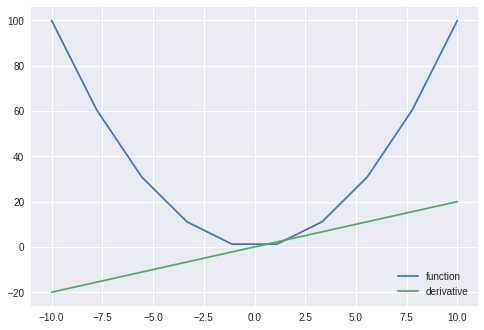

In [0]:
x = torch.linspace(-10,10,10,requires_grad=True)
print(x)
Y=x**2
print(Y)
y=x**2
print(y)
y.backward(torch.Tensor([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]))
print(x.grad)
import matplotlib.pyplot as plt
plt.plot(x.detach().numpy(),Y.detach().numpy(),label='function')
plt.plot(x.detach().numpy(),x.grad.detach().numpy(),label='derivative')
plt.legend()



**Homework: A little hack**. Explain the function below as to why we are taking **sum** compared to the above function.

Hint: Even if we have, y = x^2 ; loss = y.sum(); when we do loss.backward(), we still can get the gradient of loss w.r.t. y as sum willl be the last op of the last layer, and the graph will calculate backwards from there. 

tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True)
tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)
tensor(407.4074, grad_fn=<SumBackward0>)
tensor([-20.0000, -15.5556, -11.1111,  -6.6667,  -2.2222,   2.2222,   6.6667,
         11.1111,  15.5556,  20.0000])


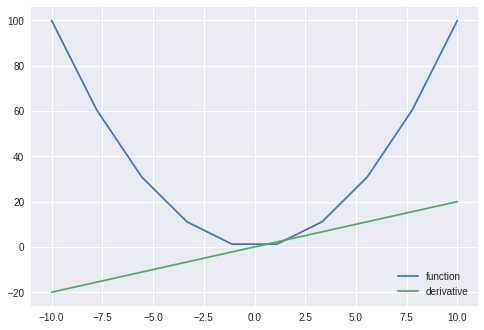

In [0]:
x = torch.linspace(-10,10,10,requires_grad=True)
print(x)
Y=x**2
print(Y)
y=torch.sum(x**2)
print(y)
y.backward()
print(x.grad)
import matplotlib.pyplot as plt
plt.plot(x.detach().numpy(),Y.detach().numpy(),label='function')
plt.plot(x.detach().numpy(),x.grad.detach().numpy(),label='derivative')
plt.legend()

**Relu Function**

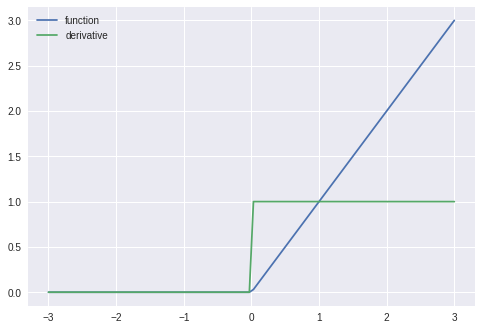

In [0]:
import torch.nn.functional as F
x=torch.linspace(-3,3,100,requires_grad=True)
Y=F.relu(x)
y=torch.sum(F.relu(x))
y.backward()
plt.plot(x.detach().numpy(),Y.detach().numpy(),label='function')
plt.plot(x.detach().numpy(),x.grad.detach().numpy(),label='derivative')
plt.legend()

## Retain graph


In PyTorch, the computation **graph** is **created** at the **start** of **each iteration** in an **epoch** and then subsequently **freed** to save memory at the **end** of that **iteration**.

In each iteration, we execute the forward pass, compute the derivatives of output w.r.t to the parameters of the network, and update the parameters to fit the given examples. After doing the backward pass, the graph will be freed to save memory. In the **next iteration**, a **fresh** new **graph** is **created** and ready for back-propagation

Because the computation graph will be freed by default after the first backward pass, you will encounter errors if you are trying to do backward on the same graph the second time. 

We can specify **retain_graph=True** when calling backward the first time to make sure the graph is retained and the buffers are not freed till we finish the backward propogation through the graph a second time.

During the optimization step, we combine the chain rule and the graph to compute the derivative (partial) of the output w.r.t the learnable variable in the graph and update these variables to make the output close to what we want.

In [0]:
#!pip3 install torch torchvision
import torch
f = torch.tensor([2.0,3.0],requires_grad=True)
print("Original Tensor: ",f)
g = f[0] * f[1]
g.backward(retain_graph=True)
#g.backward()
print("1st Backward Pass: ",f.grad)
g.backward()
print("2nd Backward Pass: ",f.grad)

Original Tensor:  tensor([2., 3.], requires_grad=True)
1st Backward Pass:  tensor([3., 2.])
2nd Backward Pass:  tensor([6., 4.])


![alt text](https://drive.google.com/uc?id=1ZCqitzhUSotar1iBaepVrWZAdSpcl1wV)

Suppose that we have a computation graph shown above. The variable d and e is the output, and a is the input. The underlining computation is:

In [0]:
import torch
a = torch.randn((1,4),requires_grad=True)
b = a**2
c = b*2
d = c.mean()
e = c.sum()

When we do d.backward(), that is fine. After this computation, the part of graph that calculate d will be freed by default to save memory. So if we do e.backward(), the error message will pop up. In order to do e.backward(), we have to set the parameter retain_graph to True in d.backward(), i.e.,

In [0]:
#d.backward(retain_graph=True)

As long as you use retain_graph=True in your backward method, you can do backward any time you want.

In [0]:
d.backward(retain_graph=True) # fine....graph is retained so no need to reconstruct again
e.backward(retain_graph=True) # fine....graph is retained so no need to reconstruct again
d.backward() # also fine
#e.backward() # error will occur!

Here the call is made again in the last sentence, the error will be reported. Because the pytorch defaults to an automatic derivation, the calculation graph is discarded. The requests need to be set manually.

In [0]:
x = torch.tensor([3.0],requires_grad=True) 
y = x * 2 + x ** 2 + 3 

y.backward(retain_graph= True ) 
print(x.grad) # Tensor containing: 8, [torch.FloatTensor of size 1] 

y.backward(retain_graph= True ) 
print(x.grad) # Output16, because the automatic derivation is done twice, so the first gradient 8 and the second gradient 8 are added to get 16 

y.backward()  # Do another automatic derivation, this time does not retain the calculation graph 
print(x.grad) # Outputs 24 

#y.backward()  # will do an error, the calculation graph has been discarded 

tensor([8.])
tensor([16.])
tensor([24.])


The addition operation don’t need buffers 

If $f(x) = x + w$ then the gradient of $f$ with respect to $w$ is 1. In this case the gradient doesn’t depend on the inputs.

If $f(x) = x * w$ then the gradient of $f$ with respect to $w$ is $x$. In this case, we need to save the input value.

In [0]:
f = torch.tensor([2.0,3.0], requires_grad=True)
g = f[0] + f[1]
g.backward()
print(f.grad)
g.backward()
print(f.grad)
print(f.grad.data[0])
print(f.is_leaf)


tensor([1., 1.])
tensor([2., 2.])
tensor(2.)
True


Usually after a backpropagation you process the next batch so you don’t need the gradients of the previous batch anymore.

**retain_variables** argument has been deprecated in favor of **retain_graph**

A **real use case** that you want to backward through the graph for more than once is multi-task learning where you have multiple losses at different layers. Suppose that you have 2 losses: loss1 and loss2 and they reside in different layers. In order to back-prop the gradient of loss1 and loss2 w.r.t to the learnable weight of your network independently. You have to use retain_graph=True in backward() method in the first back-propagated loss.

In [0]:
#loss1.backward(retain_graph=True) # suppose you first back-propagate loss1, then loss2 (you can also do it in reverse order) 
#loss2.backward() # now the graph is freed, and next process of batch gradient descent is ready
#optimizer.step() # update the network parameters

## Wrap-up

1.   The backward() function made differentiation very simple
2.   For non-scalar tensor, we need to specify **grad_tensors**
3.   If you need to backward() twice on a graph or subgraph, you will need to set retain_graph to be true
4.   Note that grad will accumulate from excuting the graph multiple times

There are several attributes related to gradients that every tensor has:

**grad**: A property which holds a tensor of the same shape containing computed gradients.

**is_leaf**: True, if this tensor was constructed by the user and False, if the object is a result of function transformation.

**requires_grad**: True if this tensor requires gradients to be calculated. This property is inherited from leaf tensors, which get this value from the tensor construction step (zeros() or torch.tensor() and so on). By default, the constructor has requires_grad=False, so if you want gradients to be calculated for your tensor, then you need to explicitly say so.

## Homework

Check if operations and functions in pytorch support broadcasting and which of them share memory and dont share memory (create new copies).

## Pytorch Example

The network will have a single hidden layer, i.e, a two-layer network and will be trained with gradient descent to fit random data by minimizing the Euclidean distance between the network output and the true output. This is adapter from module1 but implemented using pytorch without helper functions.

In [0]:
# Original Problem
# -*- coding: utf-8 -*-
import numpy as np

N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(5):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # Zero the grads is not required as we are not using torch backward() function which accumulates buffers
    
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)
    
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
   
    
    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 33873279.06498797
1 30661600.0314354
2 31819874.282981798
3 31212882.333333947
4 25930731.15114764


###Original Problem using pytorch

In [0]:
import torch

# device = torch.device("cpu") # Uncomment this to run on CPU
dtype = torch.float
device = torch.device("cuda:0") 

N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)  #64x1000
y = torch.randn(N, D_out, device=device, dtype=dtype) #64x10

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)  #1000 x 100
w2 = torch.randn(H, D_out, device=device, dtype=dtype) #100 x 10


learning_rate = 1e-6
for t in range(5):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 28795944.0
1 23632760.0
2 22605602.0
3 22144822.0
4 20285756.0


### Using pytorch built in functions.

In [0]:
import torch
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in,requires_grad=False)
y = torch.randn(N, D_out,requires_grad=False)

w1 = torch.randn(D_in, H,requires_grad=True)
w2 = torch.randn(H, D_out,requires_grad=True)

learning_rate = 1e-6

for t in range(5):
    # Do forward
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # Compute Loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.detach().item())  
    
    # Backprop to compute gradients (partial derivatives) of w1 and w2 with respect to loss
    loss.backward()
    
    # Update weights using gradient descent
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Zero them for next iteration, as we have already update the weights with gradient data
    w1.grad.data.zero_()
    w2.grad.data.zero_()


0 27877584.0
1 21995582.0
2 19702060.0
3 17997614.0
4 15818901.0


We can also use **loss.data** (**loss.data.item()**) instead of **loss.detach().item()** however it detaches the tensor from the computation graph and might lead to wrong results.

While using loss.data is unrelated to the computation graph, **loss.detach** will have its in-place changes reported by autograd if loss is needed in backward and will raise an error if necessary.

**Both share the underlying data of the tensor and have requires_grad=False**. 

Thus tensor.data gives a tensor that shares the storage with tensor, but doesn't track history hence no_grad() function is not required.

Please note In autograd, if any input Tensor of an operation has requires_grad=True, **the computation will be tracked**. For updating weights we dont need to backtrack the operation.

So to summarize, they are both used to detach tensor from computation graph and returns a tensor that shares the same data, the difference is **loss.detach() adds another constrain that when the data is changed in-place, the backward won’t be done**.

Refer to https://pytorch.org/blog/pytorch-0_4_0-migration-guide/

In [0]:
# ==================USING detach()=======================================
#!pip3 install torch torchvision
import torch
x = torch.tensor(([5.0]))
w = torch.tensor(([10.0]),requires_grad=True)
y = w*x
print(w)

c = w.detach()
c.zero_()
print(w) # Modified by c.zero_()!!

y.backward() # Error One of the variables needed for gradient computation has been modified by an inplace operation




In [18]:
# ==================USING .data()=======================================
#!pip3 install torch torchvision
import torch
x = torch.tensor(([5.0]))
w = torch.tensor(([10.0]),requires_grad=True)
y = w*x
print(w)

c = w.data
c.zero_()
print(w) # Modified by c.zero_()!!

y.backward() # Error is not reported as in-place changes are not tracked by autograd

tensor([10.], requires_grad=True)
tensor([0.], requires_grad=True)


Thus, **.data** can be unsafe in some cases. Any changes on w.data wouldn't be tracked by autograd, and the computed gradients would be incorrect if w is needed in a backward pass. A safer alternative is to use w.detach(), which also returns a Tensor that shares data with requires_grad=False, but will have its **in-place changes reported by autograd if w is needed in backward**

In [0]:
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(5):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the a scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 28906468.0
1 23217610.0
2 22110076.0
3 22007888.0
4 20815722.0


Using the **context manager no_grad()** we can avoid storing the computations done producing the output of our network in the computation graph.

The torch.no_grad() context **switches off the autograd machinery**, and can be used for operations such as parameter updates.

## Project

Implement a two layer neural network in one of these microcontrollers Microchip (pic32) or Atmel (AtsamD21/Atmega) or STM32 or ESP32 for temperature compensation for water quality monitoring

## Pytorch Libraries

### Introduction



$$\require {enclosed}
\fbox{torch.nn.Functional}
 \xrightarrow{}
\fbox{torch.nn}\\$$

**LAYERS**

**torch.nn** exposes specific functionality like layers, activation functions, loss functions etc required for constructing networks and architectures.

torch.nn is **built on top** of **torch.nn.Functional**.

torch.nn has three main parts:

1.   **Parameters** - learnable/trainable parameters, configurable parameters - 
2.   **Containers** - Containers include modules, sequences, ModuleList, ParameterList, ModuleDict, ParameterDict
3.   **Layers** - Layers include linear, normalization, convolutional, pooling, padding, dropout, recurrent

For layers with trainable parameters, we use torch.nn to create the layers or the model. We can do it two ways: 

1. **Using Sequence** - Simple models which dont require much customization
2. **Using Class** - Used to define more complicated and custom models. Our layers are stored back in the instance of a class so we can easily access the layer and the trainable parameters later.

In **sequence containers**, we use torch.nn.Sequential to compose layers from torch.nn. Thus to create a model that looks like 

$$\require {enclosed}
\fbox{input}
 \xrightarrow{}
\fbox{linear}
 \xrightarrow{}
\fbox{relu}
\xrightarrow{}
\fbox{linear}
\xrightarrow{}
\fbox{sigmoid}\\$$


* The class torch.nn.Linear does the job for us. For linear layer we need to multiply each input node with a weight, and add a bias. It applies a linear transformation to the incoming data, y=wx+b. Thus
                     model = nn.Sequential(
                     nn.Linear(n_in, n_h),
                     nn.ReLU(),
                     nn.Linear(n_h, n_out),
                     nn.Sigmoid()
                     )
* The module torch.nn.Linear(input_size, output_size, bias=True) implements a fully-connected layer.  It takes as input a tensor of size N×C and produce a tensor of size N×D. 
* We didn’t specify the weight tensors as the **weights and biases are automatically randomized at creation**.  
* Trainable parameters of a model are returned by **model.parameters()**.
* The function **torch.manual_seed(1)** will give us the same result everytime we run the code.

This Torch.nn.Linear applies a linear transformation to the incoming data, i.e. y = Ax + b. The input tensor given in forward(input) must be either a vector (1D tensor) or matrix (2D tensor). If the input is a matrix, then each row is assumed to be an input sample of given batch. The layer can be used without bias by setting bias = false.

So given input matrix as follows.

$$Sample_1 = [1, 3, 2, 6, 9]$$
$$Sample_2 = [2, 7, 1, 4, 8]$$
$$Sample_3 = [0, 2, 3, 6, 5]$$
$$Sample_4 = [8, 4, 1, 7, 9]\\$$


$${\bf X_{4x5}} = \underbrace{
                \left.\left( 
                      \begin{array}{ccccc}
                             1&3&2&6 &9\\
                             2&7&1&4 &8\\
                             0&2&3&6 &5\\
                             8&4&1&7&9
                      \end{array}
                \right)\right\}
              }_{5\text{ features}} 
              \,4\text{ samples}$$
              
 $$torch.nn.Linear(features, number \;of \;neurons)$$
 
 $$torch.nn.Linear(5, 200)$$


In [21]:
#!pip3 install torch torchvision
import torch
f = torch.nn.Linear(in_features = 10, out_features = 4)

for n, p in f.named_parameters(): 
  print(n, p.size())
  
#for param in f.parameters():
  #print(param.size())

x = torch.empty(523, 10).normal_()
y = f(x)
y.size() 
  

weight torch.Size([4, 10])
bias torch.Size([4])


torch.Size([523, 4])

There are many methods available for each module to access its children — 
* model.modules() , model.named_modules() , model.parameters() model.named_parameters() , model.children() and model.named_children(). 

But the most used is model.parameters() , as this is used to access all the parameters recursively and hence can be used to pass to an optimizer for updating weights/bias.

Parameters are of the type torch.nn.Parameter which is a Tensor with requires_grad to True, and known to be a model parameter by various utility functions, in particular torch.nn.Module.parameters()



**LOSS/COST**

torch.nn has loss/cost functions called criteria.

1. L1Loss, MSELoss, CrossEntropyLoss, CTCLoss, NLLLoss, PoissonNLLLoss, KLDivLoss, BCELoss, BCEWithLogitsLoss, MarginRankingLoss, HingeEmbeddingLoss, MultiLabelMarginLoss, SmoothL1Loss, SoftMarginLoss, MultiLabelSoftMarginLoss, CosineEmbeddingLoss, MultiMarginLoss, TripletMarginLoss

The general syntax is

> loss = torch.nn.MSELoss()

> output = loss(input, target)

> output.backward()

**Note:** Criteria/Loss do not accept a tensor with requires_grad set to True for target.

The first parameter of a loss is traditionally called the input and the second the target. These two quantities may be of different dimensions or even types for some losses (e.g.for classification).

**OPTIMIZATION/WEIGHT UPDATES**

torch.optim is a package implementing various optimization algorithms

1. ASGD, Adadelta, Adagrad, Adam, Adamax, LBFGS, RMSprop, Rprop, SGD, SparseAdam

To use torch.optim we construct an optimizer object, that will hold the current state and will update the parameters based on the computed gradients. 

We give it an iterable containing the parameters to optimize such as the learning rate, weight decay which are optimizer specific.

> optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

> optimizer = optim.Adam([var1, var2], lr = 0.0001)

**model.parameters()** returns an iterator over our model’s parameters (**weights** and **biases**).

If we need to move a model to GPU via .cuda(), we need to do so before constructing optimizers for it.

All optimizers implement a step() method, that updates the parameters **called after** the gradients are computed using **backward()**.

We also specify per-layer learning rates using dictionaries instead of iterables as below.

```
optim.SGD([
                {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)
```

Here 

> model.base’s parameters will use the default learning rate of 1e-2, 

> model.classifier’s parameters will use a learning rate of 1e-3, 

> momentum of 0.9 will be used for all parameters

**SCHEDULER - ADJUST LEARNING RATE**

torch.optim.lr_scheduler provides several methods to adjust the learning rate based on the number of epochs.

* LambdaLR, StepLR, MultiStepLR, ExponentialLR, CosineAnnealingLR, ReduceLROnPlateau

optimizer = torch.optim.Adam(dual_encoder.parameters(), lr = 0.001)

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.95)

    for epoch in range(200):

                  for i in range(len(label_array)):

                              optimizer.zero_grad()
                              
                              loss.backward()
                              
                              optimizer.step()
                               
                   scheduler.step()
                  


In [0]:
#!pip3 install torch torchvision
import torch
import torch.optim

x = torch.randn((5, 5))
w = torch.randn((5, 5),requires_grad=True)

z = w.mm(x).mean() # Perform an operation

opt = torch.optim.Adam([w], lr=2e-4, betas=(0.5, 0.999)) # Define the optimizer
z.backward() # Calculate gradients
print(w.data) # Print the weights

opt.step() # Update w according to Adam's gradient update rules
print(w.data) # Print updated weights after training step

tensor([[-1.0156,  1.0981,  1.3412, -0.8061, -1.8594],
        [-0.3851,  0.0239, -0.5087, -0.1484,  2.1908],
        [ 0.6656, -0.1045, -1.9714, -1.7648,  1.9828],
        [-1.3232,  0.0486, -1.7935, -0.2444,  1.4195],
        [-0.9755,  1.3868,  0.4843, -0.7731, -1.7140]])
tensor([[-1.0154,  1.0979,  1.3414, -0.8059, -1.8596],
        [-0.3849,  0.0237, -0.5085, -0.1482,  2.1906],
        [ 0.6658, -0.1047, -1.9712, -1.7646,  1.9826],
        [-1.3230,  0.0484, -1.7933, -0.2442,  1.4193],
        [-0.9753,  1.3866,  0.4845, -0.7729, -1.7142]])


Thus torch.nn.Sequential expects a list of the layers that we want in the neural network. in our case our list has two things, we want a linear layer (y=wx+b) whose input is a vector of some length along with a non-linear activation function relu followed another linear layer with sigmoid activation function - this is a two layer neuron model

There is also the implicit input layer which is understood.

In [0]:
import torch

#device = torch.device("cpu") # Uncomment this to run on CPU
dtype = torch.float
device = torch.device("cuda:0") 

N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)  #64x1000
y = torch.randn(N, D_out, device=device, dtype=dtype) #64x10

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)  #1000 x 100
w2 = torch.randn(H, D_out, device=device, dtype=dtype) #100 x 10

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Sigmoid())

model = model.cuda()

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_function = torch.nn.MSELoss(reduction='sum').cuda()

# Set the learning rate value
learning_rate = 1e-4

for t in range(5):
  # Forward pass: compute predicted y by passing x to the model. Module objects
  # override the __call__ operator so you can call them like functions. When
  # doing so you pass a Tensor of input data to the Module and it produces
  # a Tensor of output data. Basically construct the graph
  y_pred=model(x)
  
  
  # Compute and print loss. We pass Tensors containing the predicted and true
  # values of y, and the loss function returns a Tensor containing the
  # loss.
  loss = loss_function(y_pred, y)
  print(t, "{:.20f}".format(loss.item()))
  
  # Zero the gradients before running the backward pass.
  model.zero_grad()
  
  # Backward pass: compute gradient of the loss with respect to all the learnable
  # parameters of the model. Internally, the parameters of each Module are stored
  # in Tensors with requires_grad=True, so this call will compute gradients for
  # all learnable parameters in the model.
  loss.backward()
  
  # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad

0 719.92944335937500000000
1 714.84710693359375000000
2 709.86169433593750000000
3 704.94543457031250000000
4 700.09936523437500000000


Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters (with torch.no_grad() or .data to avoid tracking history in autograd). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the nn package to define our model as before, but we will optimize the model using the Adam algorithm provided by the **optim package**:

In [0]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out))

loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(5):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x) # Compute the graph

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    print(t, "{:.20f}".format(loss.item()))

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    

0 735.59613037109375000000
1 717.49017333984375000000
2 699.83526611328125000000
3 682.65753173828125000000
4 665.90002441406250000000


###Using Class

In PyTorch when using classes, we define the Models as subclasses of torch.nn.Module. 

The two functions required while defining (inherenting) any model using class are:

1. **__init__** - We define all the parametric (and sometimes non-parametric) layers. This function has to always be inherited first, then we define parameters of the layer such as the class variables i.e. self.x
2. **forward**  - We connect all the layers and other functions to the input to form a graph.

In the \__init\__ function,  we initialize the layers we want to use and Pytorch goes more low level and we have to specify the sizes of our network so that everything matches.

In the forward method, we specify the connections of your layers. This means that we will use the layers we already initialized, in order to re-use the same layer for each forward pass of data we make.

For layers that do not have trainable weights, we can use either the **layer form** (from torch.nn) or **connection form** (from torch.nn.functional), 



In [0]:
#!pip3 install torch torchvision
import torch

import torch.nn as nn
import torch.nn.functional as F

class net(torch.nn.Module):
  def __init__(self):
    super(net,self).__init__() # Can also use torch.nn.Module.__init__(self)
    self.linear1=torch.nn.Linear(D_in,H)
    self.linear2=torch.nn.Linear(H,D_out)
    
  def forward(self,x):
    h_relu = torch.nn.functional.relu(self.linear1(x))
    #h_relu = self.linear1(x).clamp(min=0)
    y_pred = self.linear2(h_relu)
    return y_pred

During the **forward pass, the inputs must be passed** to the graph being constructed and any output must be returned for the loss to be calculated.

In the class definition, you can see the inheritance from the base class nn.Module. The inherited class gets all of the functionality, capabilities in the parenthesis class when subclassing. We then can add additional functionality to it.

Then, in the first line of the class initialization **( def \__init\__(self)**: ) we have the required super() function, which creates an instance of the base nn.Module class. We initialize the superclass functionality that is the superclass nn.module has to be built before we can add our pieces using it. i.e, we have to construct the superclass first.

The **self keyboard** makes sure that the instantiating class is able instantiate its own data.

The next lines is where we create **define** our fully connected **layers** as per the architecture diagram. A fully connected neural network layer is represented by the nn.Linear object, with the first argument in the definition being the number of nodes in layer l and the next argument being the number of nodes in layer l+1.

Now we’ve setup the “skeleton” of our network architecture, we have to **define how data flows** through out network i.e, how the **computational graph** is connected. We do this by defining a **forward()** method in our class – this method overwrites a dummy method in the base class, and needs to be defined for each network.

Note:
1. Each class method should have an argument **self** as its **first argument**. **self** is a parameter common to all class methods. In general, a function is floating free, unencumbered whereas a class (instance) method has to be aware of the parent (and parent properties) so self is a way of passing the method a reference to the parent class. 

2. Variables created by the keyword **self** unique to each instance of the class

3. Class variables are shared by all instances and dont have the keyword self.

4. \__init\__ is the default method that is invoked when the object (instance) is first created. The method call to this method is immediate and automatic after the creation of the class instance. 




In [0]:
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).cuda()
y = torch.randn(N, D_out).cuda()

#x = x.type(torch.FloatTensor)
#y = y.type(torch.FloatTensor)

mymodel = net()
print(mymodel)

# Move to gpu if available:
if torch.cuda.is_available():
  mymodel.cuda()

net(
  (linear1): Linear(in_features=1000, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)


The above step **creates** an **instance of the network architecture**. We then setup an optimizer and a loss criteria. In PyTorch, the optimizer knows how to optimize any attribute of type Parameter.

In [0]:
# create a stochastic gradient descent optimizer
optimizer = torch.optim.SGD(mymodel.parameters(), lr=0.0009, momentum=0.9)
# create a loss function
#criterion = nn.NLLLoss()
criterion = torch.nn.MSELoss(reduction='sum')

We finally run the main training loop. The optimizer.step() does a single updation of all the parameters using the new gradients calculated for every backward call.

In [0]:
epochs = 5
for epoch in range(epochs):
  optimizer.zero_grad()
  model_output = mymodel(x)
  loss = criterion(model_output, y)
  print(epoch, "{:.20f}".format(loss.item()))
  loss.backward()
  optimizer.step()
  

0 649.82720947265625000000
1 355.57498168945312500000
2 203.70831298828125000000
3 94.66721343994140625000
4 204.43922424316406250000


The special method **forward()** will **automatically** get called when the layer is calculated and its gonna get passed the data from previous layer.

###Using Custom Class

In [0]:
# -*- coding: utf-8 -*-
import torch


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        #h_relu = self.linear1(x).clamp(min=0)
        h_relu = torch.nn.functional.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

for t in range(5):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x) #Construct the graph

    # Compute and print loss, can directly call nn.functional.mse_loss(out, y)since it is a non-parametric function
    loss = criterion(y_pred, y)
    print(t, "{:.20f}".format(loss.item()))

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
sum([p.numel() for p in model.parameters()])

0 625.60498046875000000000
1 575.80346679687500000000
2 532.95007324218750000000
3 495.57931518554687500000
4 462.55068969726562500000


101110

Notice that we **never explicitly call forward pass** defined within the class. We always call the Module instance afterwards instead since it takes care of running the registered hooks while the former silently ignores them.

We can also obtain the number of trainable parameters of a model using in the last line of code.

**torch.nn only supports mini-batches**. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample. For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width. If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.

This is motivated by the computational speed-up it induces. To evaluate a module on a sample, both the module’s parameters and the sample have to be first copied into cache memory, which is fast but small. For any model of reasonable size, only a fraction of its parameters can be kept in cache, so a module’s parameter have to be copied there every time it is used. These memory transfers are slower than the computation itself.This is the main reason for batch processing: it cuts down to one per module per batch the number of copies of parameters to the cache. It also cuts down the use of Python loops, which are awfully slow.

###torch.nn vs torch.nn.functional

A nn.Module is actually a OO wrapper around the functional interface, that contains a number of utility methods, like eval() and parameters(), and it automatically creates the parameters of the modules for us. 

We can use the functional interface whenever we want, but that requires us to define the weights by hand. 

The difference between torch.nn and torch.nn.functional is very subtle. In fact, many torch.nn.functional have a corresponding equivalent in torch.nn. 

In many code samples, we **use torch.nn.functional for simpler operations that have no trainable parameters or configurable parameters**. For example for ReLU, we do not require any learnable parameters to be called in forward() method hence it can be defined using the torch.nn.functional interface.

Alternatively, in some sections, we use torch.nn.Sequential to compose layers from torch.nn only. 

Both approaches are simple and more like a coding style issue rather than any major implementation differences. There isnt any performance difference.

If all layers are defined with nn.functional, then all variables, such as weights, bias, etc., need to be manually defined by the user, which is very inconvenient.

The functions in torch.nn.functional are just some arithmetical operations, not the layers which have trainable parameters such as weights and bias terms.

As a result, layers with parameters are usually initialized in init to be shared by the whole module, while some connections or simple operations without parameters can be defined in forward to be used in forward propagation.
   

### Using Mixed Approach (Class and Non-class)

In [0]:
import torch

class Model(torch.nn.Module):
    super().__init__()
    self.feature_extractor = nn.Sequential(
        Conv2d(3, 12, kernel_size=3, padding=1, stride=1),
        Conv2d(12, 24, kernel_size=3, padding=1, stride=1),)

    def forward(self, x):
        x = self.feature_extractor(x)
        return x    


###Initializing parameters of the model

1. We can loop over the parameters of the module using model.parameters() and then initializing each with tensor functions such as exponential, uniform, fill etc.

2. Every module have an attribute definition **.apply** . We can call this apply on the module and pass it a function which handles the initialization for each of the parameter. Whenever .apply is called on a module, it is called on each of the module and parameter recursively.

3. We could use **torch.nn.init** module to initialize our parameters in more practical way. Suppose we have a parameter named m, and we need to initialize it using Xavier (Glorot) initialization, then we can do torch.nn.init.xavier_uniform(m) . Now, combining this with .apply we can use the module torch.nn.init to initialize parameters of all sort.

Applies function recursively to every submodule (as returned by .children()) as well as self. Typical use case includes initializing the parameters of a model (we also use torch-nn-init).

In [0]:
import torch.nn as nn
def init_weights(m):
        print(m)
        if type(m) == nn.Linear:
            #m.weight.data.fill_(1.0)
            nn.init.xavier_uniform_(m.weight.data)
            print(m.weight.data)

net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2))
net.apply(init_weights)


Linear(in_features=2, out_features=2, bias=True)
tensor([[-0.3341,  0.1696],
        [ 1.0626,  0.4128]])
Linear(in_features=2, out_features=2, bias=True)
tensor([[-1.1414, -0.7872],
        [ 0.1243, -0.1141]])
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)


Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

###Accessing Parameters and Modules

In [0]:
seq_net = nn.Sequential(
	nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1)
)

print(seq_net[0])
print(seq_net[1])
print(seq_net[0].weight)


Linear(in_features=2, out_features=4, bias=True)
Tanh()
Parameter containing:
tensor([[-0.2519,  0.0680],
        [ 0.2745, -0.6395],
        [-0.6839, -0.1879],
        [-0.4628,  0.4401]], requires_grad=True)


**parameters(recurse=True)**

Returns an iterator over module parameters. This is typically passed to an optimizer.

In [0]:
for param in net.parameters():
  print(param,":",param.size())

Parameter containing:
tensor([[-0.3341,  0.1696],
        [ 1.0626,  0.4128]], requires_grad=True) : torch.Size([2, 2])
Parameter containing:
tensor([-0.3686, -0.4479], requires_grad=True) : torch.Size([2])
Parameter containing:
tensor([[-1.1414, -0.7872],
        [ 0.1243, -0.1141]], requires_grad=True) : torch.Size([2, 2])
Parameter containing:
tensor([0.1928, 0.0775], requires_grad=True) : torch.Size([2])


**named_parameters(prefix='', recurse=True)**

Returns an iterator over module parameters, yielding both the name of the parameter as well as the parameter itself.

In [0]:
for name, param in net.named_parameters():
    print(name,": ",param.size())

0.weight :  torch.Size([2, 2])
0.bias :  torch.Size([2])
1.weight :  torch.Size([2, 2])
1.bias :  torch.Size([2])


**buffers(recurse=True)**

Returns an iterator over module buffers. If  recurse=True, then yields buffers of this module and all submodules. Otherwise, yields only buffers that are direct members of this module

In [0]:
for buf in net.buffers():
  print(type(buf.data), buf.size())

**named_buffers(prefix='', recurse=True)**

Returns an iterator over module buffers, yielding both the name of the buffer as well as the buffer itself.

**Children( modules)**

Returns an iterator over immediate children modules

In [0]:
for child in net.children():
  print(child)

Linear(in_features=2, out_features=2, bias=True)
Linear(in_features=2, out_features=2, bias=True)


**named_children()**

Returns an iterator over immediate children modules, yielding both the name of the module as well as the module itself.

In [0]:
for name, module in net.named_children():
  print(name," : ", module)

0  :  Linear(in_features=2, out_features=2, bias=True)
1  :  Linear(in_features=2, out_features=2, bias=True)


**modules**()

Returns an iterator over all modules in the network.

In [0]:
for idx, m in enumerate(net.modules()):
  print(idx, ' ', m)

0   Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)
1   Linear(in_features=2, out_features=2, bias=True)
2   Linear(in_features=2, out_features=2, bias=True)


**named_modules(memo=None, prefix='')**

Returns an iterator over all modules in the network, yielding both the name of the module as well as the module itself. Duplicate modules are returned only once.

In [0]:
l = nn.Linear(2, 2)
net = nn.Sequential(l, l)
for idx, m in enumerate(net.named_modules()):
  print(idx,":",m)

0 : ('', Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
))
1 : ('0', Linear(in_features=2, out_features=2, bias=True))


###Move to cpu

Moves all model parameters and buffers to the CPU

In [0]:
net.cpu() 

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

###Move to GPU

The main idea behind PyTorch’s GPU handling is that if an object (tensor, Variable, Parameter) is available on a device with id 0 , then after performing some operation (transformation) on it, the resultant object will also be stored on the same device 0. Further, **operations cannot be performed on two objects residing on different devices**, i.e., no a+b is allowed if a is on CPU and b is on GPU.

So, in order to run our training on GPU, it is enough to copy our model parameters and our input data on the GPU. This is done using** .cuda()** attribute available for all tensors and modules. For tensor, it is straightforward that this will copy the tensor to GPU, but for module (model), calling .cuda() will recursively copy all child modules and parameters to GPU.

We can verify if torch.cuda.is_available() returns True to check if a GPU is available on a machine.

cuda(device=None)

###Access individual layer weights and gradients

predict (before training) tensor([ 0.6933, -0.2722], device='cuda:0')
progress: 0 4.059016227722168
progress: 1 4.050872802734375
progress: 2 4.035438537597656
progress: 3 4.01350736618042
progress: 4 3.9858198165893555


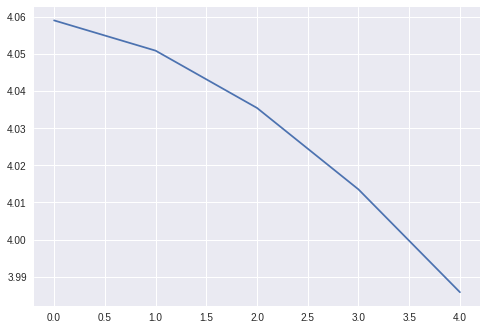

predict (after training) tensor([-0.0500,  1.1712], device='cuda:0')


In [0]:
import torch

import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


x = torch.randn(1, 2).cuda()
y = torch.randn(1, 1).cuda()


class net(torch.nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.linear1=torch.nn.Linear(2,1)
    self.linear2=torch.nn.Linear(1,2)
    
  def forward(self,x):
    h_relu = torch.nn.functional.relu(self.linear1(x))
    y_pred = self.linear2(h_relu)
    return y_pred

mymodel = net()
  
if torch.cuda.is_available():
  mymodel.cuda()

optimizer = torch.optim.SGD(mymodel.parameters(), lr=0.0009, momentum=0.9)

# Before training
print("predict (before training)", mymodel(x).data[0])

loss_col = []
epochs = 5
for epoch in range(epochs):
  optimizer.zero_grad()
  model_output = mymodel(x)
  loss = torch.nn.functional.mse_loss(model_output, y) # direct use of mse_loss from nn.functional
  loss_col.append(loss)
  #print(epoch, "{:.20f}".format(loss.item()))
  loss.backward()
  optimizer.step()
  print("progress:", epoch, loss.data.item())

plt.plot(loss_col)
plt.show()  
  
#print(list(mymodel.parameters()))

# After training
hour_var = torch.Tensor([1.0,4.0]).cuda()
y_pred = mymodel(hour_var)
print("predict (after training)", y_pred.data)

Sometimes it gets difficult to plot our loss with respect to every parameter.** As a result, we will store the loss in a list for each iteration.**

We simply create an empty list, calculate the loss, and then store the loss value in the list. We plot out the loss for each iteration.

In [0]:
print(mymodel.linear1.weight.grad.size())
print(mymodel.linear1.weight.data[0]) 
print(mymodel.linear1.weight.data.norm())       # norm of the weight
print(mymodel.linear1.weight.grad.data.norm())  # norm of the gradients

torch.Size([1, 2])
tensor([-0.2707,  0.3983], device='cuda:0')
tensor(0.4816, device='cuda:0')
tensor(0.1064, device='cuda:0')


###Save and Load Models

You can save the models and load them back for inference. They are two ways of doing it:

1. Save the **entire model** and load it back - torch.save function saves a serialized object to disk. This function uses Python’s pickle utility for serialization. Models, tensors, and dictionaries of all kinds of objects can be saved using this function. Similarly torch.load function uses pickle’s unpickling facilities to deserialize pickled object files to memory. This function also facilitates the device to load the data into.

2. Save **only model** parameters - Neural network modules as well as optimizers have the ability to save and load their internal state using .state_dict(). With this we can continue training from previously saved state dicts and if needed
we'd just need to call .load_state_dict(state_dict). 

 * torch.save(model.state_dict(), '/results/model.pth')

 * torch.save(optimizer.state_dict(), '/results/optimizer.pth')
 
A **state_dict** is simply a Python dictionary object that maps each layer with learnable parameters (convolutional layers, linear layers, etc.) to its parameter tensor (weights and biases accessed by accessed with model.parameters()).

**Optimizer objects** (torch.optim) also have a **state_dict**, which contains information about the optimizer’s state, as well as the hyperparameters used

Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers.


In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in mymodel.state_dict():
    print("\n",param_tensor, "\t", mymodel.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("\nOptimizer's state_dict:")
for var_name in optimizer.state_dict():
    print("\n",var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:

 linear1.weight 	 torch.Size([1, 2])

 linear1.bias 	 torch.Size([1])

 linear2.weight 	 torch.Size([2, 1])

 linear2.bias 	 torch.Size([2])

Optimizer's state_dict:

 state 	 {140457425290800: {'momentum_buffer': tensor([[ 0.1319, -0.4384]], device='cuda:0')}, 140457425291016: {'momentum_buffer': tensor([1.2258], device='cuda:0')}, 140457425291088: {'momentum_buffer': tensor([[3.1567],
        [1.9048]], device='cuda:0')}, 140457425291160: {'momentum_buffer': tensor([9.9480, 6.0028], device='cuda:0')}}

 param_groups 	 [{'lr': 0.0009, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [140457425290800, 140457425291016, 140457425291088, 140457425291160]}]


In [0]:
# Save only model parameters
torch.save(mymodel.state_dict(), "/content/rahul.pth")

# Load only model parameters
# To re-read the parameters of the model, first we need to redefine the model once, then re-read the parameters 
mymodel_n = net().cuda()
mymodel_n.load_state_dict(torch.load("/content/rahul.pth"))

print(mymodel_n)
# print(list(mymodel_n.parameters()))

# model.eval()
hour_var = torch.Tensor([1.0,4.0]).cuda()
y_pred_n = mymodel_n(hour_var)
print("predict (after training)", y_pred_n.data)

net(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
  (linear2): Linear(in_features=1, out_features=2, bias=True)
)
predict (after training) tensor([-0.0500,  1.1712], device='cuda:0')


Notice that the load_state_dict() function takes a dictionary object, NOT a path to a saved object. This means that you must **deserialize the saved state_dict** before you pass it to the load_state_dict() function. For example, you CANNOT load using model.load_state_dict(PATH)

**Save entire model**

Saving a model in the below way will save the entire module using Python’s pickle module. The **disadvantage** of this approach is that the **serialized data is bound to the specific classes** and the exact directory structure used when the model is saved. The reason for this is because pickle does not save the model class itself. Rather, it saves a path to the file containing the class, which is used during load time. Because of this, your code can break in various ways when used in other projects or after refactors.

In [0]:
# Save the entire model
torch.save(mymodel,"/content/rahule.pt") 

# Load the entire model
mymodel_nf = torch.load("/content/rahule.pt")

# model.eval()
hour_var = torch.Tensor([1.0,4.0]).cuda()
y_pred_nf = mymodel_nf(hour_var)
print("predict (after training)", y_pred_nf.data)

**Checkpoint saving**

When saving using a general checkpoint (to be used for either inference or resuming training) we must save more than just the model’s state_dict. It is important to also save the optimizer’s state_dict, as this contains buffers and parameters that are updated as the model trains. 

Other items that we may want to save are the epoch we left off on, the latest recorded training loss, external torch.nn.Embedding layers, etc.

To save multiple components, organize them in a dictionary and use torch.save() to serialize the dictionary. A common PyTorch convention is to save these checkpoints using the .tar file extension.

To **load the items, first initialize the model and optimizer**, then load the dictionary locally using torch.load(). From here, you can easily access the saved items by simply querying the dictionary as you would expect.

Remember that you must **call model.eval()** to set dropout and batch normalization layers to evaluation mode **before running inference**. Failing to do this will yield inconsistent inference results. If you wish to resuming training, call model.train() to ensure these layers are in training mode.

In [0]:
# Checkpoint save
torch.save({
            'epoch': epoch,
            'model_state_dict': mymodel.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            ...
            }, PATH)

In [0]:
# Checkpoint load
model = TheModelClass(*args, **kwargs)
optimizer = TheOptimizerClass(*args, **kwargs)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
# - or -
model.train()

**Multiple Models in One File**

When saving a model comprised of multiple torch.nn.Modules, such as a GAN, a sequence-to-sequence model, or an ensemble of models, you follow the same approach as when we are saving a general checkpoint. 

In other words, save a dictionary of each model’s state_dict and corresponding optimizer. As mentioned before, we can save any other items that may aid us in resuming training by simply appending them to the dictionary.

A common PyTorch convention is to save these checkpoints using the .tar file extension.

To load the models, first initialize the models and optimizers, then load the dictionary locally using torch.load(). From here, you can easily access the saved items by simply querying the dictionary as you would expect.

Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results. If you wish to resuming training, call model.train() to set these layers to training mode.

In [0]:
torch.save({
            'modelA_state_dict': modelA.state_dict(),
            'modelB_state_dict': modelB.state_dict(),
            'optimizerA_state_dict': optimizerA.state_dict(),
            'optimizerB_state_dict': optimizerB.state_dict(),
            ...
            }, PATH)

In [0]:
modelA = TheModelAClass(*args, **kwargs)
modelB = TheModelBClass(*args, **kwargs)
optimizerA = TheOptimizerAClass(*args, **kwargs)
optimizerB = TheOptimizerBClass(*args, **kwargs)

checkpoint = torch.load(PATH)
modelA.load_state_dict(checkpoint['modelA_state_dict'])
modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimizerA.load_state_dict(checkpoint['optimizerA_state_dict'])
optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

modelA.eval()
modelB.eval()
# - or -
modelA.train()
modelB.train()

**Using Parameters from a Different Model**

Partially loading a model or loading a partial model are common scenarios when transfer learning or training a new complex model. Leveraging trained parameters, even if only a few are usable, will help to warmstart the training process and hopefully help your model converge much faster than training from scratch.

Whether you are loading from a partial state_dict, which is missing some keys, or loading a state_dict with more keys than the model that you are loading into, you can set the strict argument to False in the load_state_dict() function to ignore non-matching keys.

If you want to load parameters from one layer to another, but some keys do not match, simply change the name of the parameter keys in the state_dict that you are loading to match the keys in the model that you are loading into.

In [0]:
torch.save(modelA.state_dict(), PATH)

In [0]:
modelB = TheModelBClass(*args, **kwargs)
modelB.load_state_dict(torch.load(PATH), strict=False)

**Saving & Loading Model Across Devices**

1. Save on GPU, Load on CPU
2. Save on GPU, Load on GPU
3. Save on CPU, Load on GPU

**Save on GPU, Load on CPU**

When loading a model on a CPU that was trained with a GPU, **pass torch.device('cpu') to the map_location argument** in the torch.load() function. In this case, the storages underlying the tensors are dynamically remapped to the CPU device using the map_location argument.

In [0]:
# Save
torch.save(model.state_dict(), PATH)

# Load
device = torch.device('cpu')
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device)

**Save on CPU, Load on GPU**

When loading a model on a GPU that was trained and saved on CPU, set the map_location argument in the torch.load() function to cuda:device_id. This loads the model to a given GPU device. Next, be sure to call model.to(torch.device('cuda')) to convert the model’s parameter tensors to CUDA tensors. Finally, be sure to use the .to(torch.device('cuda')) function on all model inputs to prepare the data for the CUDA optimized model. Note that calling my_tensor.to(device) returns a new copy of my_tensor on GPU. It does NOT overwrite my_tensor. Therefore, remember to manually overwrite tensors: my_tensor = my_tensor.to(torch.device('cuda')).

In [0]:
torch.save(model.state_dict(), PATH)

device = torch.device("cuda")
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device) # Model to GPU
# Make sure to call the code; input = input.to(device) on any input tensors that you feed to the model

**Save on GPU, Load on GPU**

When loading a model on a GPU that was trained and saved on GPU, simply convert the initialized model to a CUDA optimized model using model.to(torch.device('cuda')). Also, be sure to use the .to(torch.device('cuda')) function on all model inputs to prepare the data for the model. Note that calling my_tensor.to(device) returns a new copy of my_tensor on GPU. It does NOT overwrite my_tensor. Therefore, remember to manually overwrite tensors: my_tensor = my_tensor.to(torch.device('cuda')).

In [0]:
# Save
torch.save(model.state_dict(), PATH)

# Load
device = torch.device("cuda")
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device) # Model to GPU
# Make sure to call the code; input = input.to(device) on any input tensors that you feed to the model

###Forward and Backward Hooks

For inspecting / modifying the output and grad_output of a layer during forward or backward propogation we introduce hooks. 

A **hook is a function that can be registered on a module or a tensor**.

The hook can be a forward hook or a backward hook. 

The **register_forward_hook** & **register_backward_hook** functions are similar to the register_hook variable function, which can be register_hook when the module propagates forward or backpropagates.

A **forward hook function is executed each time the forward propagation execution ends**. 

The forward-propagating hook function has the following form: 

**hook(module, input, output)** -> None, 

and backpropagation has the following form: 

**hook(module, grad_input, grad_output)** -> Tensor or None .

The hook function should not modify the input and output, and **should be deleted in time after use** to avoid running the hook every time which can increase the running load. 

Hook functions are mainly used in scenarios where some intermediate results are obtained, such as the output of a layer in the middle or the gradient of a layer. These results should have been written in the forward function, but if you add these processing to the forward function, it may make the processing logic more complicated. At this time, it is more appropriate to use the hook technique. 

Let's consider a scenario. There is a pre-trained model that needs to extract the output of a layer (not the last layer) of the model as a feature, but does not want to modify its original model definition file. You can use the hook function. The code of the implementation is given below.

PyTorch recursively applies any hook to all submodules on a register_forward_hook() call.

In [0]:
#!pip3 install torch torchvision

In [0]:
import torch

import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


x = torch.randn(1, 2).cuda()
y = torch.randn(1, 1).cuda()


class net(torch.nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.linear1=torch.nn.Linear(2,1)
    self.linear2=torch.nn.Linear(1,2)
    
  def forward(self,x):
    h_relu = torch.nn.functional.relu(self.linear1(x))
    y_pred = self.linear2(h_relu)
    return y_pred
  
def forwardcall(module,input,output):
  print("\nInside forward of ", module," : ",input," : ", output)
  
def backwardcall(module, grad_input, grad_output):
  print("Inside backward of ", module," : ",grad_input," : ", grad_output)

mymodel = net()

print(mymodel)
hook1 = mymodel.linear1.register_forward_hook(forwardcall)
hook2 = mymodel.linear2.register_backward_hook(backwardcall)

  
if torch.cuda.is_available():
  mymodel.cuda()

optimizer = torch.optim.SGD(mymodel.parameters(), lr=0.0009, momentum=0.9)

loss_col = []
epochs = 5
for epoch in range(epochs):
  optimizer.zero_grad()
  model_output = mymodel(x)
  loss = torch.nn.functional.mse_loss(model_output, y) 
  loss_col.append(loss)
  #print(epoch, "{:.20f}".format(loss.item()))
  loss.backward()
  optimizer.step()
  
hook1.remove()  # removes the hook
hook2.remove()  # removes the hook

net(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
  (linear2): Linear(in_features=1, out_features=2, bias=True)
)

Inside forward of  Linear(in_features=2, out_features=1, bias=True)  :  (tensor([[-0.7917,  1.6142]], device='cuda:0'),)  :  tensor([[-0.0311]], device='cuda:0', grad_fn=<AddmmBackward>)
Inside backward of  Linear(in_features=1, out_features=2, bias=True)  :  (tensor([-1.5735, -1.8884], device='cuda:0'), tensor([[-0.2341]], device='cuda:0'), tensor([[-0., -0.]], device='cuda:0'))  :  (tensor([[-1.5735, -1.8884]], device='cuda:0'),)

Inside forward of  Linear(in_features=2, out_features=1, bias=True)  :  (tensor([[-0.7917,  1.6142]], device='cuda:0'),)  :  tensor([[-0.0311]], device='cuda:0', grad_fn=<AddmmBackward>)
Inside backward of  Linear(in_features=1, out_features=2, bias=True)  :  (tensor([-1.5721, -1.8867], device='cuda:0'), tensor([[-0.2339]], device='cuda:0'), tensor([[-0., -0.]], device='cuda:0'))  :  (tensor([[-1.5721, -1.8867]], device='cuda:0

The **current implementation will not have above behavior for complex Module** that perform many operations. 

In some failure cases, grad_input and grad_output will only contain the gradients for a subset of the inputs and outputs. 

For such Module, you should use torch.Tensor.register_hook() directly on a specific input or output to get the required gradients.

###Training/Evaluation Modes

This is to change the mode of the model, to put it in training mode while training and to put it in evaluation mode while testing. This affects only those layers that behave differently during training and testing such as Dropout, BatchNorm etc

eval(): Sets the module in evaluation mode. This has any effect only on certain modules. See particular modules for details of their behaviors in training/evaluation mode, if they are affected, e.g. Dropout, BatchNorm, etc.

train(mode=True): Sets the module in training mode. This has any effect only on certain modules

For example **loss is not required during evaluation** as the model is already built with weights. We only need to infer it with new data.

In [0]:
# You should be able to check the training state of the model:

if mymodel.training == True:
    print("Model is in training mode")
if mymodel.training == False:
    print("Model is in Evaluation mode")


Model is in training mode


###Moves and/or cast the parameters and buffers

In [0]:
linear = nn.Linear(2, 2)
print(linear.weight)

linear.to(torch.double)
print(linear.weight)

gpu1 = torch.device("cuda:0")
print(linear.to(gpu1, dtype=torch.half, non_blocking=True))

print(linear.weight)
cpu = torch.device("cpu")

linear.to(cpu)
print(linear.weight)

Parameter containing:
tensor([[-0.3195,  0.6755],
        [ 0.2388,  0.2219]], requires_grad=True)
Parameter containing:
tensor([[-0.3195,  0.6755],
        [ 0.2388,  0.2219]], dtype=torch.float64, requires_grad=True)
Linear(in_features=2, out_features=2, bias=True)
Parameter containing:
tensor([[-0.3196,  0.6758],
        [ 0.2388,  0.2218]], device='cuda:0', dtype=torch.float16,
       requires_grad=True)
Parameter containing:
tensor([[-0.3196,  0.6758],
        [ 0.2388,  0.2218]], dtype=torch.float16, requires_grad=True)


###Scheduler

Decays the learning rate of each parameter group by gamma every step_size epochs. Notice that such decay can happen simultaneously with  other changes to the learning rate from outside this scheduler.

**scheduler.step() only changes learning rate, but does not perform optimizer step. You also have to call optimizer.step(), regardless of the fact that you use scheduler or not.**

note that optim.param_groups is a list of the different weight groups which can have different learning rates and it is accessible as:

    for g in optim.param_groups:
        g['lr'] = 0.001

In [0]:
import torch

import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.randn(1, 2).cuda()
y = torch.randn(1, 1).cuda()

class net(torch.nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.linear1=torch.nn.Linear(2,1)
    self.linear2=torch.nn.Linear(1,2)
    
  def forward(self,x):
    h_relu = torch.nn.functional.relu(self.linear1(x))
    y_pred = self.linear2(h_relu)
    return y_pred

mymodel = net()
print(mymodel)


if torch.cuda.is_available():
  mymodel.cuda()

#optimizer = torch.optim.SGD(mymodel.parameters(), lr=0.0009, momentum=0.9)
optimizer = torch.optim.SGD(mymodel.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.99)

# Train flag can be updated with boolean
# to disable dropout and batch norm learning
mymodel.train(True)
# execute train step

loss_col = []
epochs = 50
for epoch in range(epochs):
  optimizer.zero_grad()
  model_output = mymodel(x)
  loss = torch.nn.functional.mse_loss(model_output, y) 
  loss_col.append(loss)
  print("\nIteration:",epoch,"Loss:","{:.20f}".format(loss.item()))
  print("lr: ", "{:.20f}".format(optimizer.param_groups[0]['lr']))
  loss.backward()
  scheduler.step()
  optimizer.step()
  

mymodel.train(False)
# run inference step

# CPU seed
torch.manual_seed(42)
# GPU seed
torch.cuda.manual_seed_all(42)

net(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
  (linear2): Linear(in_features=1, out_features=2, bias=True)
)

Iteration: 0 Loss: 0.92028093338012695312
lr:  0.01000000000000000021

Iteration: 1 Loss: 0.88778233528137207031
lr:  0.01000000000000000021

Iteration: 2 Loss: 0.85650908946990966797
lr:  0.00990000000000000081

Iteration: 3 Loss: 0.82641303539276123047
lr:  0.00980100000000000068

Iteration: 4 Loss: 0.79744863510131835938
lr:  0.00970298999999999988

Iteration: 5 Loss: 0.76957285404205322266
lr:  0.00960596009999999979

Iteration: 6 Loss: 0.74274420738220214844
lr:  0.00950990049899999926

Iteration: 7 Loss: 0.71692287921905517578
lr:  0.00941480149400999999

Iteration: 8 Loss: 0.69207096099853515625
lr:  0.00932065347906989999

Iteration: 9 Loss: 0.66815221309661865234
lr:  0.00922744694427920023

Iteration: 10 Loss: 0.64513164758682250977
lr:  0.00913517247483640847

Iteration: 11 Loss: 0.62297552824020385742
lr:  0.00904382075008804479

Iteration: 12 

### Debugging

With its clean and minimal design, PyTorch makes debugging a breeze. We can place breakpoints using pdb.set_trace() at any line in our code. We can then execute further computations, examine the PyTorch Tensors/Variables and pinpoint the root cause of the error.

### Inplace Operations

torch.nn.functional.relu(input, inplace=False) takes a tensor of any size as input, applies ReLU on each value to produce a result tensor of same size.

inplace indicates if the operation should modify the argument itself.  This may be desirable to reduce the memory footprint of the processing. 


###Wrap-up
                          
1. Inherit a class from torch.nn.module - initialize: define modules, forward: build network
2. Create an object (instance) - Construct graphs when class in initialized and forward is called
3. Define optimizer and loss function
4. Run loop - reset gradient, backward, update step 



**Multi-processing:**

torch.nn.dataparallel

torch.multiprocessing

hogwild(async)


###Homework

Solve the previous celsius to fahrenheit problem using pytorch classes and functions. Hook to the backpropogation for each iteration and plot the change of values. 

Finally, Save the model, load the model and run in evaluation mode and evalute the performance of the model for a given sample.

Check if a gpu is present and use gpu for accelerating the entire model and training.


## ANNs for Images

### Image Theory

Pixels are the raw building blocks of an image. Every image consists of a set of pixels. There is no finer granularity than the pixel. Normally, a pixel is considered the “color” or the “intensity” of light that appears in a given place in our image. 

Most pixels are represented in two ways: 

1. Grayscale/single channel 
2. Color - 3 Channel (RGB)

![alt text](https://upload.wikimedia.org/wikipedia/commons/3/33/Beyoglu_4671_tricolor.png)

In a **grayscale image**, each pixel is a scalar value between 0 and 255, where **zero** corresponds to **“black”** and **255** being **“white”**. Values between 0 and 255 are varying shades of gray, where values closer to 0 are darker and values closer to 255 are lighter.

* Grayscale = Image Batch x Channel x Height x Weight  = Image Batch x 1 x Height x Weight = Image Batch x H x W

Pixels in the RGB color space are represented by a list of three values: one value for the Red component, one for Green, and another for Blue.

* Color = Image Batch x C x H x W



**RGB and BGR Ordering** - It is important to note that some softwares for example OpenCV stores RGB channels in reverse order. While we normally think in terms of Red, Green, and Blue, OpenCV actually stores the pixel values in Blue, Green, Red order (BGR). 




### Data Preparation and Preprocessing

Data Loading

For convenience, PyTorch provides a number of utilities to load, preprocess and interact with datasets. These helper classes and functions are found in the torch.utils.data module. 

PyTorch offers the torch.utils.data.DataLoader object which combines a data-set and a sampling policy to create an iterator over mini-batches. 

Standard data-sets are available in torchvision.datasets, and they allow to apply transformations over the images or the labels transparently

The two major concepts here are:

    A Dataset, which encapsulates a source of data,
    A DataLoader, which is responsible for loading a dataset, possibly in parallel.

New **datasets** are created by 
* **subclassing** the torch.utils.data.Dataset class and 
* initializating the __init__ function to actually load the data from media or database or url or using generators
* the __getitem__ method to access a **single value** at a **certain index** and
* overriding the __len__ method to return the number of samples in the dataset 

In [33]:
from torch.utils.data import Dataset

class c2fdata(Dataset):
  def __init__(self):
    self.celsius = torch.tensor([(float)(c) for c in range(-273,1000)])
    self.fahrenheit = torch.tensor([c*1.8+32.0 for c in self.celsius])
  
  def __getitem__(self,index):
    return self.celsius[index],self.fahrenheit[index]
  
  def __len__(self):
    return self.celsius.shape[0]
  
mydataset = c2fdata()

print(mydataset[0])
print(len(mydataset))
    

(tensor(-273.), tensor(-459.4000))
1273


Inside __init__ we would usually configure some paths or change the set of samples ultimately returned. In __len__, we specify the upper bound for the index with which __getitem__ may be called, and in __getitem__ we return the actual sample, which could be an image or an audio snippet.

To iterate over the dataset we could, in theory, simply have a for i in range loop and access samples via __getitem__. 

In [34]:
for i in range(len(mydataset)):
  print(mydataset[i])
  if i == 3:
        break

(tensor(-273.), tensor(-459.4000))
(tensor(-272.), tensor(-457.6000))
(tensor(-271.), tensor(-455.8000))
(tensor(-270.), tensor(-454.))


However, it would be much more convenient if the dataset implemented the iterator protocol itself, so we could simply loop over samples with for sample in dataset. 

We are losing a lot of features by using a simple for loop to iterate over the data. In particular, we are missing out on:

    Batching the data
    Shuffling the data
    Load the data in parallel using multiprocessing workers.

Fortunately, this functionality is provided by the **DataLoader class** available via the **torch.utils.data.DataLoader** which is an iterator which provides all these features.

A DataLoader object takes a **dataset object as argument** and a number of options that configure the way samples are retrieved. For example, it is possible to load samples in **parallel**, using multiple processes. For this, the DataLoader constructor takes a **num_workers** argument. 

Note that DataLoaders always return batches, whose size is set with the **batch_size** parameter. 

List of important arguments for **dataloader**:

$$\begin{array}{|c|c|}
\hline
 Argument & Description \\\hline
dataset \;(Dataset) & dataset\; object \;from\; which\; to\; load\; the\; data\\\hline
batch\_size (int, optional) & how \;many \;samples \;per \;batch \;to \;load (default: 1)\\\hline
shuffle (bool, optional) & set \;to\; True\; to\; have\; the\; data\; reshuffled\; at\; every\; epoch\; (default: False).\\\hline
num_workers (int, optional) &  how\; many\; subprocesses\; to\; use\; for\; data\; loading.\; 0\; means\; that\; the\; data\; will\; be\; loaded\; in\; the\; main\; process (default: 0)\\\hline
collate\_fn (callable, optional) & specify\; how\; exactly\; the\; samples\; need\; to\; be\; batched\; to\; form\; a\; mini-batch\;\\\hline
\end{array}$$  


In [47]:
mydataloader = torch.utils.data.DataLoader(mydataset,batch_size=6,num_workers=2)
for i, batch in enumerate(mydataloader):
  print(i, batch)

0 [tensor([-273., -272., -271., -270., -269., -268.]), tensor([-459.4000, -457.6000, -455.8000, -454.0000, -452.2000, -450.4000])]
1 [tensor([-267., -266., -265., -264., -263., -262.]), tensor([-448.6000, -446.8000, -445.0000, -443.2000, -441.4000, -439.6000])]
2 [tensor([-261., -260., -259., -258., -257., -256.]), tensor([-437.8000, -436.0000, -434.2000, -432.4000, -430.6000, -428.8000])]
3 [tensor([-255., -254., -253., -252., -251., -250.]), tensor([-427.0000, -425.2000, -423.4000, -421.6000, -419.8000, -418.0000])]
4 [tensor([-249., -248., -247., -246., -245., -244.]), tensor([-416.2000, -414.4000, -412.6000, -410.8000, -409.0000, -407.2000])]
5 [tensor([-243., -242., -241., -240., -239., -238.]), tensor([-405.4000, -403.6000, -401.8000, -400.0000, -398.2000, -396.4000])]
6 [tensor([-237., -236., -235., -234., -233., -232.]), tensor([-394.6000, -392.8000, -391.0000, -389.2000, -387.4000, -385.6000])]
7 [tensor([-231., -230., -229., -228., -227., -226.]), tensor([-383.8000, -382.0000

In [48]:
mydataloader = torch.utils.data.DataLoader(mydataset,batch_size=6, shuffle=True, num_workers=2, drop_last=True)
for i, batch in enumerate(mydataloader):
  print(i, batch)

0 [tensor([  80.,  693.,  236., -111.,  235.,  279.]), tensor([ 176.0000, 1279.4000,  456.8000, -167.8000,  455.0000,  534.2000])]
1 [tensor([ 244.,  248.,  -53., -182.,  417.,  403.]), tensor([ 471.2000,  478.4000,  -63.4000, -295.6000,  782.6000,  757.4000])]
2 [tensor([704., -28., 563., 645., 690., 660.]), tensor([1299.2000,  -18.4000, 1045.3999, 1193.0000, 1274.0000, 1220.0000])]
3 [tensor([ 252.,  -84.,   69.,  -77., -191.,  232.]), tensor([ 485.6000, -119.2000,  156.2000, -106.6000, -311.8000,  449.6000])]
4 [tensor([ 881.,  267.,  398.,  590.,  132., -118.]), tensor([1617.7999,  512.6000,  748.4000, 1094.0000,  269.6000, -180.4000])]
5 [tensor([420., 507., 644., 947., 378., 174.]), tensor([ 788.0000,  944.6000, 1191.2000, 1736.6000,  712.4000,  345.2000])]
6 [tensor([647., 954., 506., 184., 842., 914.]), tensor([1196.6000, 1749.2000,  942.8000,  363.2000, 1547.6000, 1677.2000])]
7 [tensor([ 694.,  623.,  189.,  908.,  589., -180.]), tensor([1281.2000, 1153.4000,  372.2000, 1666.

In [0]:
import math

class RangeDataset(torch.utils.data.Dataset):
  def __init__(self, start, end, step=1):
    self.start = start
    self.end = end
    self.step = step
  def __getitem__(self, index):
    value = self.start + index * self.step
    assert value < self.end
    return value
  def __len__(self):
    return math.ceil((self.end - self.start) / self.step)



In [41]:
dataset = RangeDataset(0, 10)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2, drop_last=True)

for i, batch in enumerate(data_loader):
  print(i, batch)

0 tensor([0, 6, 2, 4])
1 tensor([8, 1, 3, 7])


* Here, we set batch_size to 4, so returned tensors will contain exactly four values. 

* By passing shuffle=True, the index sequence with which data is accessed is permuted, such that individual samples will be returned in random order. 

* We also passed drop_last=True, so that if the number of samples left for the final batch of the dataset is less than the specified batch_size, that batch is not returned. This ensures that all batches have the same number of elements, which may be an invariant that we need. 

* Finally, we specified num_workers to be two, meaning data will be fetched in parallel by two processes. Once the DataLoader has been created, iterating over the dataset and thereby retrieving batches is simple and natural.

### Transforms

### Torch.Vision

We have seen how to use datasets, transforms and dataloader. 

torchvision package provides some common datasets and transforms. You might not even have to write custom classes. One of the more generic datasets available in torchvision is **ImageFolder**. It assumes that images are organized in the following way:

root/ants/xxx.png

root/ants/xxy.jpeg

root/ants/xxz.png

.

.

.

root/bees/123.jpg

root/bees/nsdf3.png

root/bees/asd932_.png

where ‘ants’, ‘bees’ etc. are class labels.

In [0]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
mydataset = datasets.ImageFolder(root='root',transform=data_transform)
dataset_loader = torch.utils.data.DataLoader(mydataset,batch_size=4, shuffle=True,num_workers=4)

The DataLoader actually has some reasonably sophisticated logic to determine how to collate individual samples returned from our dataset’s __getitem__ method into a batch, as returned by the DataLoader during iteration. 

For example, if __getitem__ returns a dictionary, the DataLoader will aggregate the values of that dictionary into a single mapping for the entire batch, using the same keys. This means that if the Dataset’s __getitem__ returns a dict(example=example, label=label), then the batch returned by the DataLoader will return something like dict(example=[example1, example2, ...], label=[label1, label2, ...]), i.e. unpacking the values of indidvidual samples and re-packing them into a single key for the batch’s dictionary. 

To override this behavior, you can pass a function argument for the collate_fn parameter to the DataLoader object.

### MNIST Example